#Description

## Introduction
In a global view, lotteries are considered 100% random, but applying data science techniques can help us extract insights from past results and improve our chances of winning. This algorithm aims to analyze past Mega Sena lottery results and generate a new game based on statistical analysis and machine learning.

## Data Collection and Cleaning
The algorithm starts by collecting a dataset of past Mega Sena lottery results, including the winning numbers and their frequencies. The data is then cleaned and organized by frequency for each position.

## Statistical Analysis
Main statistics data such as count, mean, standard deviation, min, 25%, 50%, 75%, and max are calculated. Using the standard deviation, a new dataset is generated, and a new game is randomly selected from this dataset. This ensures that the generated numbers are not just random but within a range of past results that is statistically relevant.

## Moving Average and Machine Learning
Moving average is then applied to the past results to identify any trends or patterns in the data. A machine learning algorithm that depends on time-series is used to analyze the data and predict the next game. The algorithm is designed to consider the order of the games, ensuring that the predictions make sense.

## Game Generation and Validation
Finally, three games are generated: the new game based on the standard deviation, a new game chosen by a human randomly, and the game generated by the machine learning algorithm. These games are then compared with the actual result of the next Mega Sena lottery to analyze the accuracy of the algorithm.

## Conclusion
The main goal of this algorithm is to apply data science techniques and discuss statistical methods that can be used to extract insights from past Mega Sena lottery results. It is intended for learning and practice purposes only and should not be used as a guarantee to win the lottery.

# Importing data

In [ ]:
# Making a post request to https://asloterias.com.br/download-todos-resultados-mega-sena to get all results
import pandas as pd
import requests
from os.path import exists

# Define function to download the data
def download_data():
  url = 'https://asloterias.com.br/download_excel.php'

  headers = {
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
      'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
      'Content-Type': 'application/x-www-form-urlencoded',
      'Referer': 'https://asloterias.com.br/download-todos-resultados-mega-sena',
      'Sec-Fetch-Dest': 'document',
      'Sec-Fetch-Mode': 'navigate',
      'Sec-Fetch-Site': 'same-origin',
      'Upgrade-Insecure-Requests': '1'
  }

  data = {
      'l': 'ms',
      't': 't',
      'o': 'c',
      'f1': '',
      'f2': ''
  }

  response = requests.post(url, headers=headers, data=data)

  # save the response content to a file
  with open('/content/megasena_data.xlsx', 'wb') as f:
      f.write(response.content)

# Define function to read data
def read_data():
  return pd.read_excel('/content/megasena_data.xlsx', skiprows=6)

# Check if there is already a file downloaded
file_exists = exists('megasena_data.xlsx')

if not file_exists:
  download_data()
  megasena_data = read_data()
  print('Data downloaded')
else:
  megasena_data = read_data()
  print('Data loaded')

megasena_data.head(10)


Data loaded


,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2579,01/04/2023,5,10,26,35,38,44
1,2578,29/03/2023,37,39,47,50,59,60
2,2577,25/03/2023,12,18,22,31,44,50
3,2576,22/03/2023,29,32,33,35,38,43
4,2575,18/03/2023,4,12,14,41,46,53
5,2574,16/03/2023,12,17,43,44,48,60
6,2573,14/03/2023,6,26,32,35,37,49
7,2572,11/03/2023,3,7,15,22,24,50
8,2571,08/03/2023,9,18,33,38,41,51
9,2570,04/03/2023,8,18,26,27,47,50


# Organizing Data

In [ ]:
# Position with the numbers
games = megasena_data.iloc[:, 2:]
positions = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
games.columns = positions
games.head()

,position_1,position_2,position_3,position_4,position_5,position_6
0,5,10,26,35,38,44
1,37,39,47,50,59,60
2,12,18,22,31,44,50
3,29,32,33,35,38,43
4,4,12,14,41,46,53


In [ ]:
# Information table (date and game number)
info = megasena_data.iloc[:, 0:2]
info.head()

,Concurso,Data
0,2579,01/04/2023
1,2578,29/03/2023
2,2577,25/03/2023
3,2576,22/03/2023
4,2575,18/03/2023


# Defining and importing important libs

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure better quality for the plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("darkgrid")

# Sorting positions by Frequency

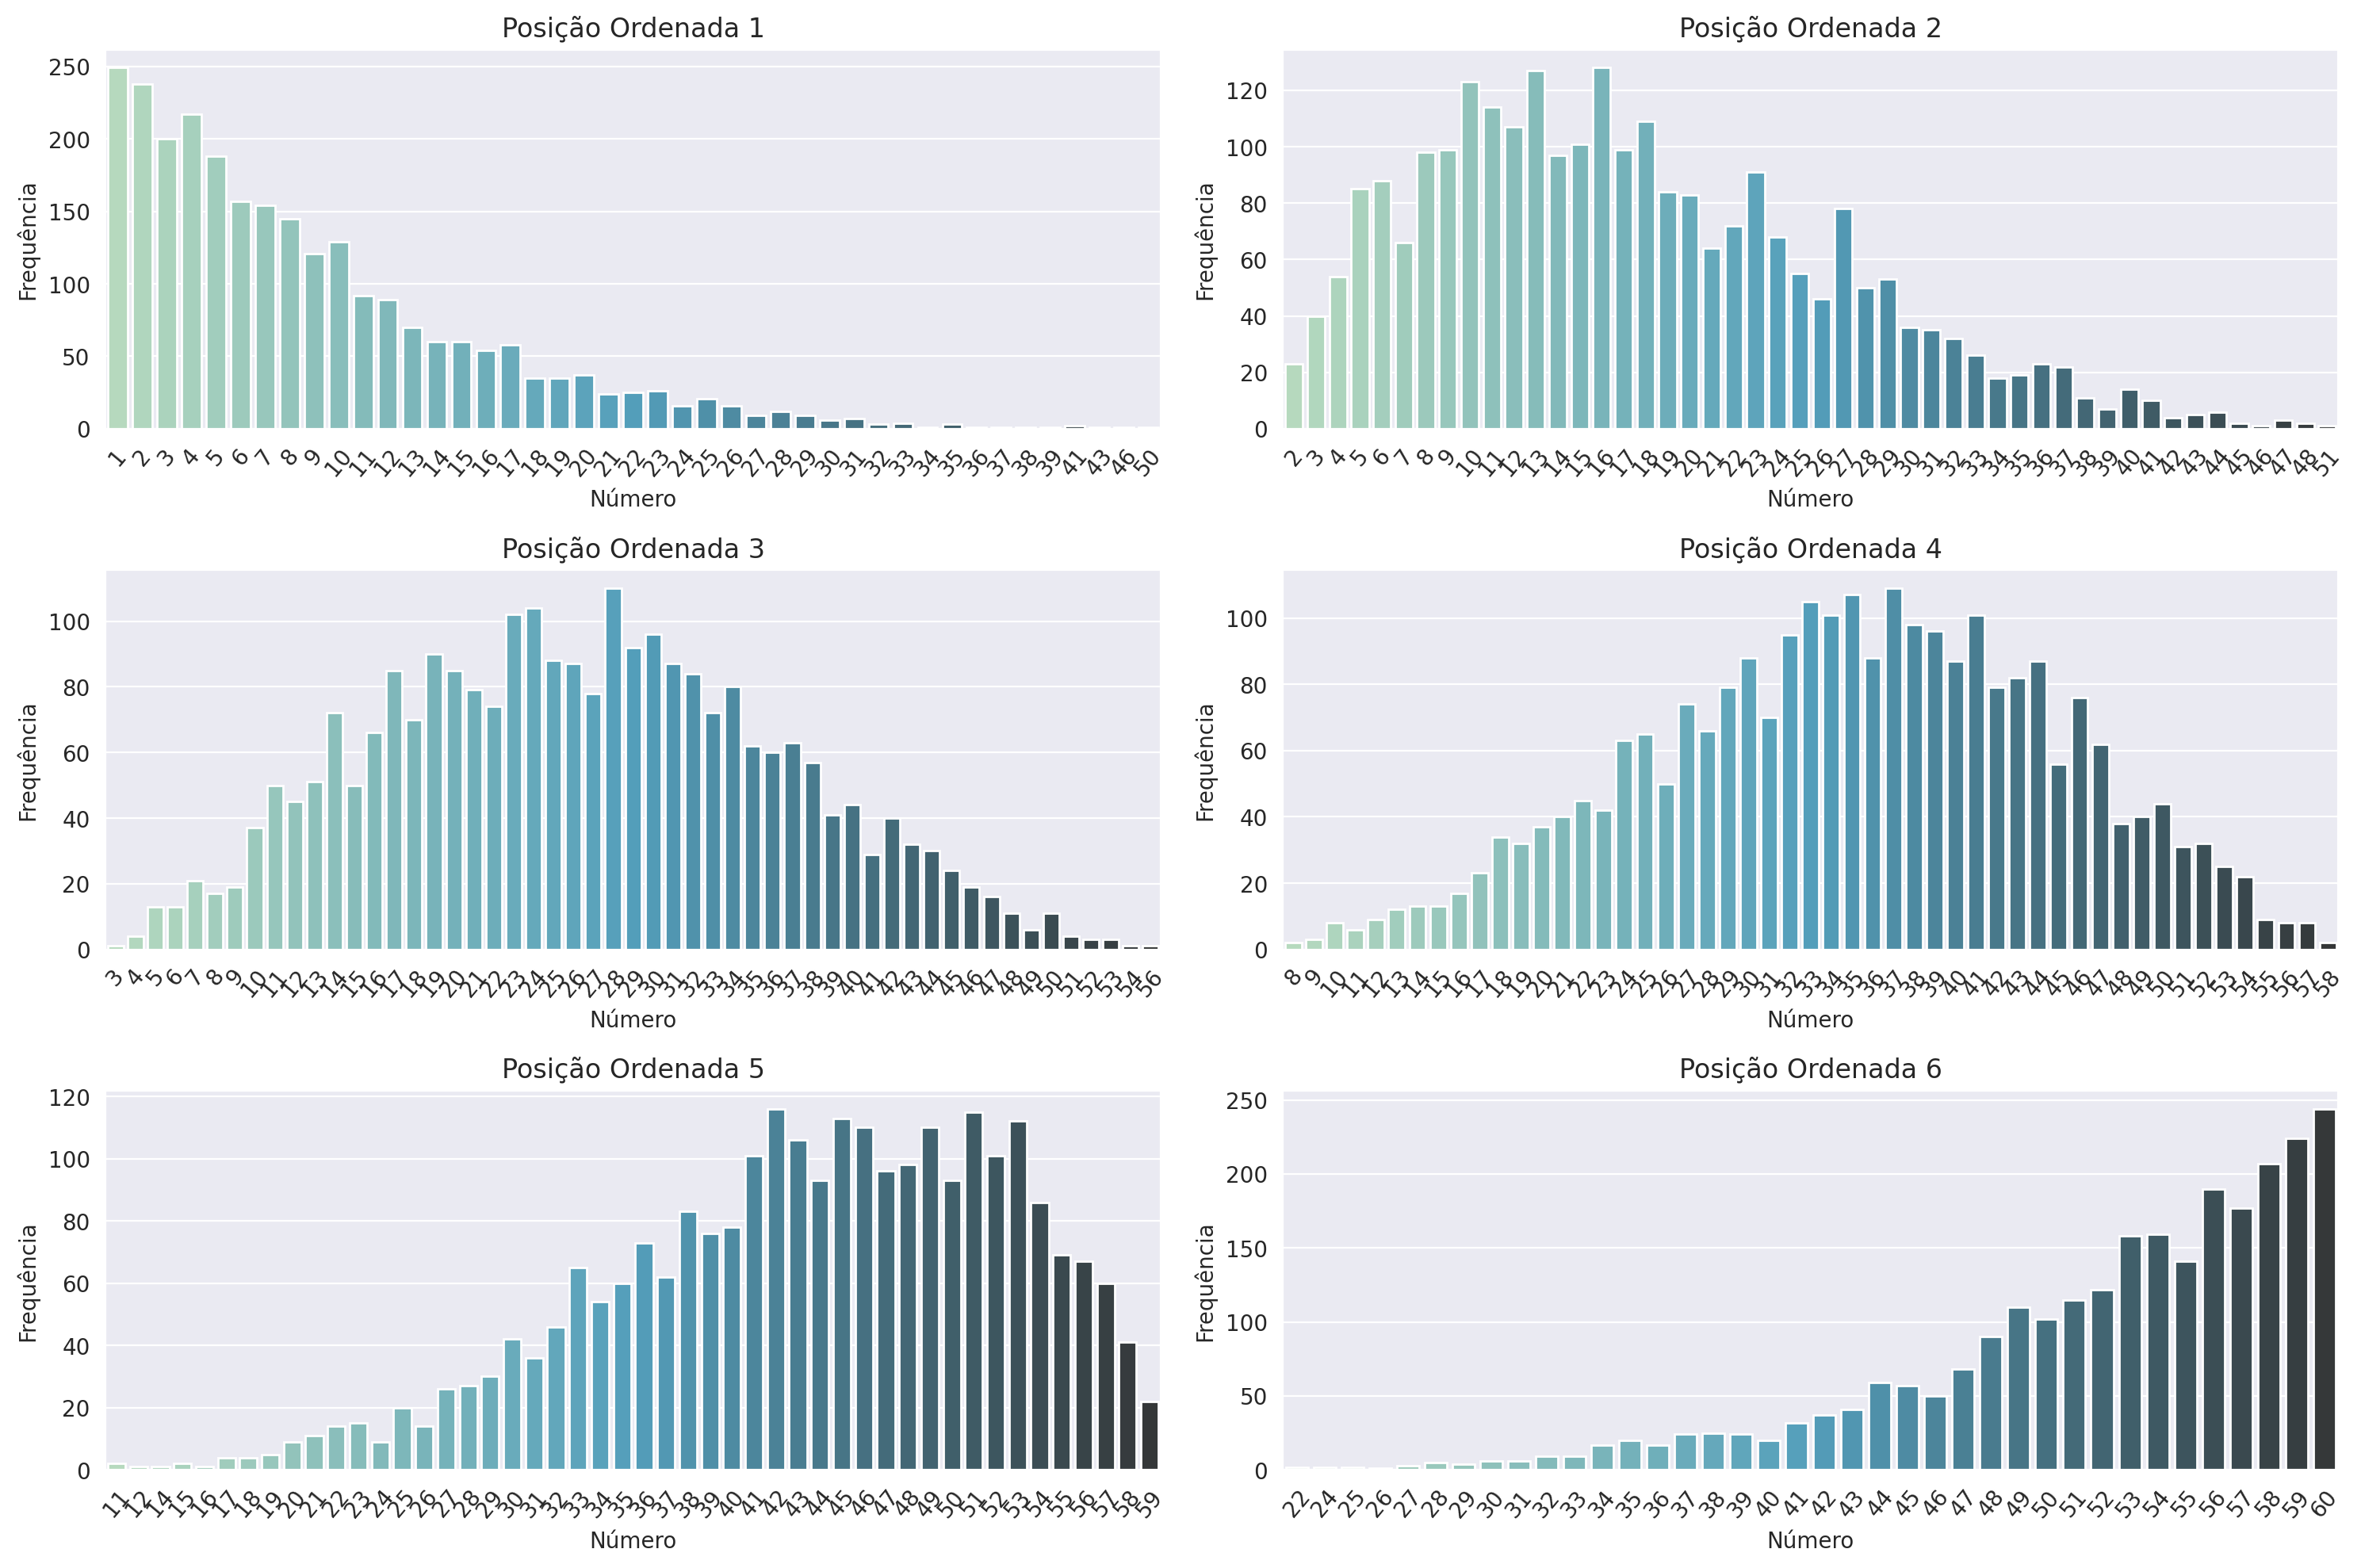

In [ ]:
sorted_positions = []
for i, position in enumerate(positions):
  sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)

plt.tight_layout()
plt.show()


## Finding a relation between Guassian Distribution and Position 4

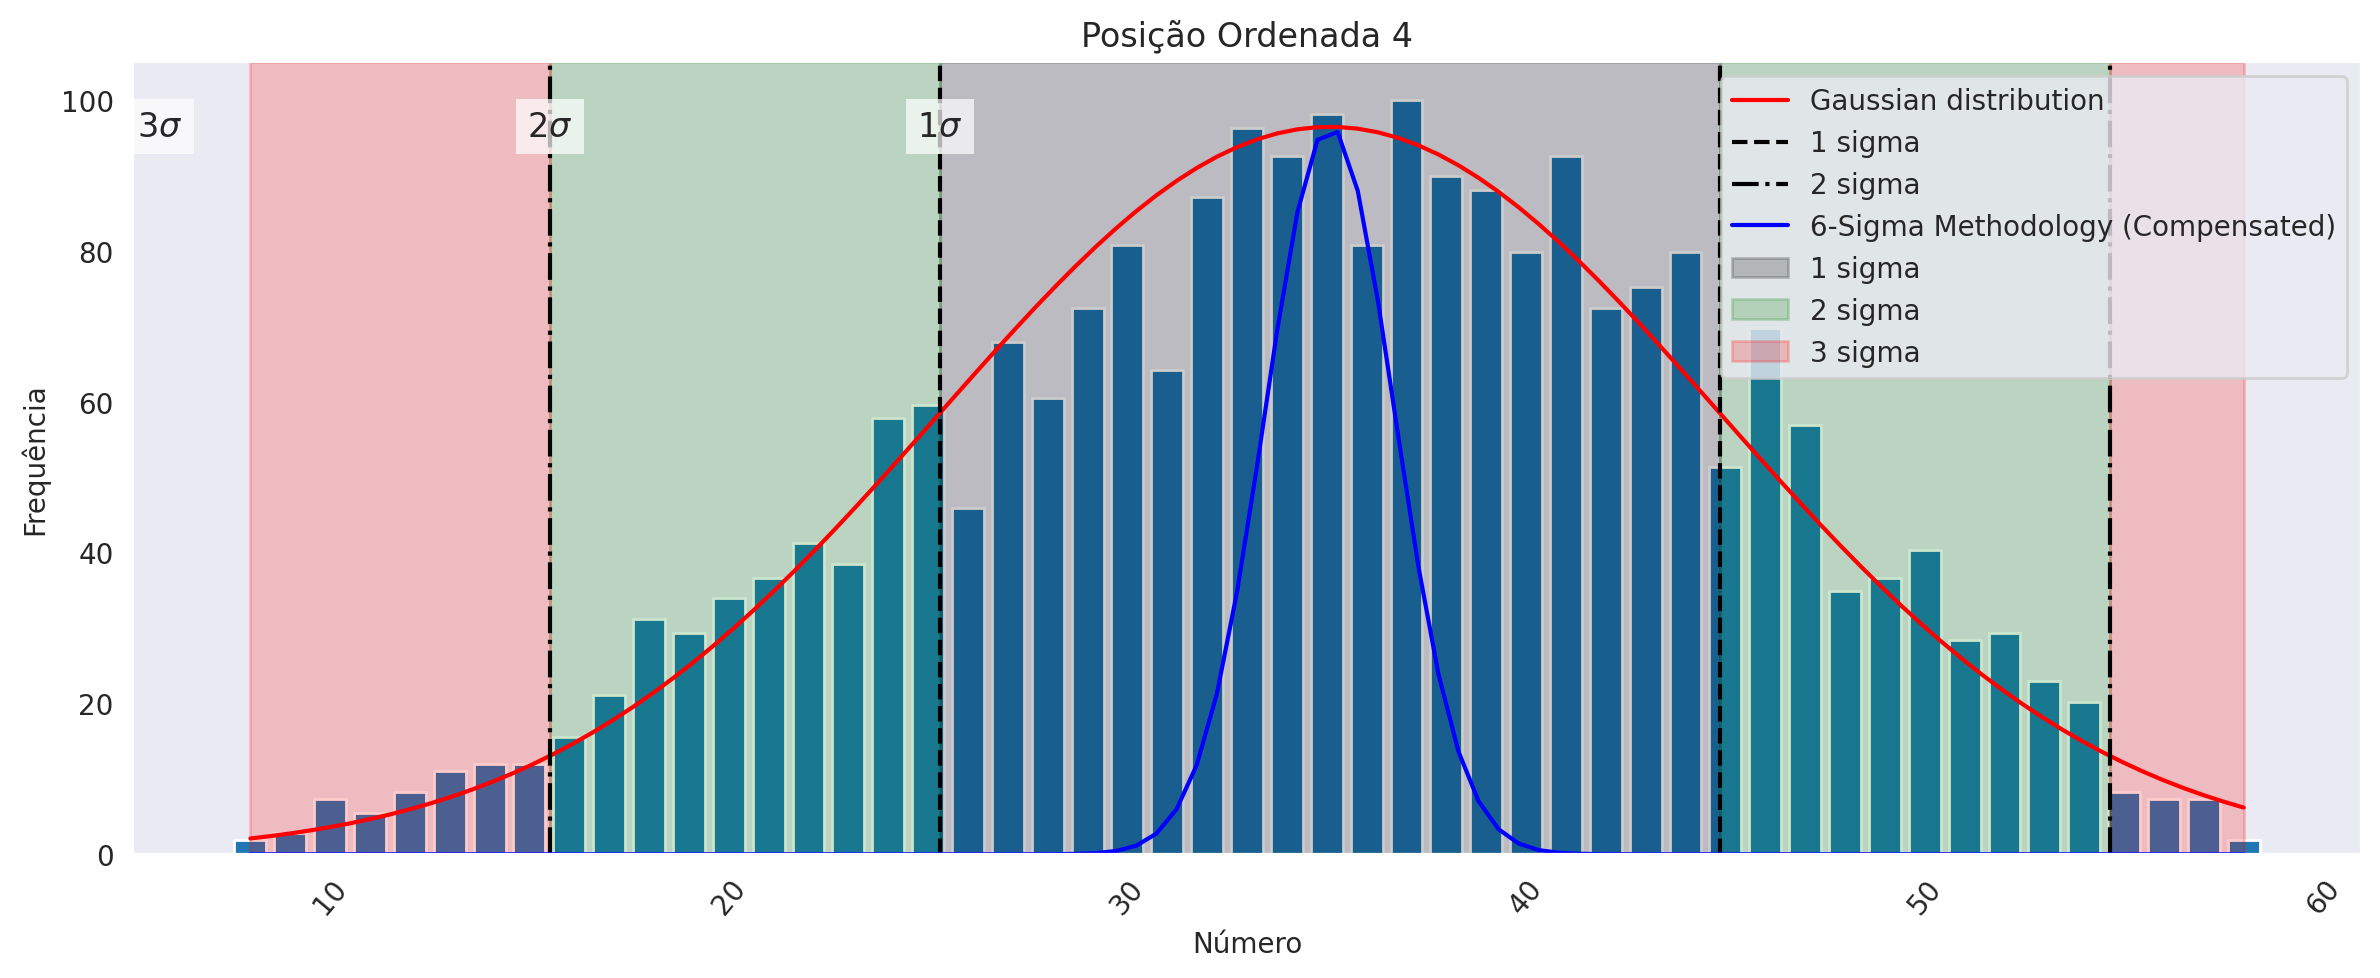

In [ ]:
from scipy.stats import norm

position_index = 3 # position 4
array = games.iloc[:, position_index]
sorted_array = sorted_positions[position_index]

# Plot position
fig, axs = plt.subplots(figsize=(12, 5))
axs.bar(x=sorted_array.index, height=sorted_array.values * 100 / sorted_array.values.max())
axs.set_title(f"Posição Ordenada {position_index+1}")
axs.set_xlabel('Número')
axs.set_ylabel('Frequência')
axs.tick_params(axis='x', labelrotation=50)

# Generate data for the Gaussian distribution
mean = array.mean()
std = array.std()
length = array.count() - 1
mu, sigma = mean, std
x = np.linspace(sorted_array.index.min(), sorted_array.index.max(), 100)
y = norm.pdf(x, mu, sigma) * length * 100 / sorted_array.values.max()

# Plot the Gaussian distribution and sigma lines
axs.plot(x, y, color='r', label='Gaussian distribution') # Plot the Gaussian distribution
axs.axvline(mu - sigma, color='k', linestyle='--', label='1 sigma') # Plot the first sigma line
axs.axvline(mu + sigma, color='k', linestyle='--') # Plot the second sigma line
axs.axvline(mu - 2*sigma, color='k', linestyle='-.', label='2 sigma') # Plot the third sigma line
axs.axvline(mu + 2*sigma, color='k', linestyle='-.') # Plot the fourth sigma line

# Plot the Gaussian distribution for 6-sigma methodology
y_six_sigma = norm.pdf(x, mu, sigma / 6) * length * 100 / (6 * sorted_array.values.max())
axs.plot(x, y_six_sigma, color='b', label='6-Sigma Methodology (Compensated)') # Plot the Gaussian distribution

# Shade the areas under the sigma curves
alpha = 0.2
axs.axvspan(mu - sigma, mu + sigma, alpha=alpha, color='k', label='1 sigma')
axs.axvspan(mu - 2*sigma, mu - sigma, alpha=alpha, color='g', label='2 sigma')
axs.axvspan(mu + sigma, mu + 2*sigma, alpha=alpha, color='g')
axs.axvspan(x.min(), mu - 2*sigma, alpha=alpha, color='r', label='3 sigma')
axs.axvspan(mu + 2*sigma, x.max(), alpha=alpha, color='r')

# Add text labels for the percentage values
for i, s in enumerate(['1', '2', '3']):
    x_pos = mu - (i+1)*sigma
    y_pos = y.max()*(1 + 0.1*(i+1))
    axs.text(x_pos, y.max(), s + r'$\sigma$', fontsize=12,
              bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
              horizontalalignment='center', verticalalignment='center')
    
axs.grid(False) # Turn off the grid for the second y-axis
axs.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the percentage of data points within one standard deviation of the mean
def check_sigma_percentage(sigma_analysed):
  lower_bound = mu - sigma_analysed*sigma
  upper_bound = mu + sigma_analysed*sigma
  within_sigma = sorted_array.loc[(sorted_array.index >= lower_bound) & (sorted_array.index <= upper_bound)]
  return ((within_sigma.sum() / sorted_array.sum()) * 100)

print(f"Percentage within one sigma: {check_sigma_percentage(1):.2f}%. Ideal: 68.27%. Error: {(check_sigma_percentage(1)-68.27)/68.27*100:.2f}%")
print(f"Percentage within two sigma: {check_sigma_percentage(2):.2f}%. Ideal: 95.45%. Error: {(check_sigma_percentage(2)-95.45)/95.45*100:.2f}%")
print(f"Percentage within three sigma: {check_sigma_percentage(3):.2f}%. Ideal: 99.73%. Error: {(check_sigma_percentage(3)-99.73)/99.73*100:.2f}%")



Percentage within one sigma: 64.44%. Ideal: 68.27%. Error: -5.60%
Percentage within two sigma: 96.39%. Ideal: 95.45%. Error: 0.99%
Percentage within three sigma: 100.00%. Ideal: 99.73%. Error: 0.27%


## Sorting by Frequency in Decrescent Order

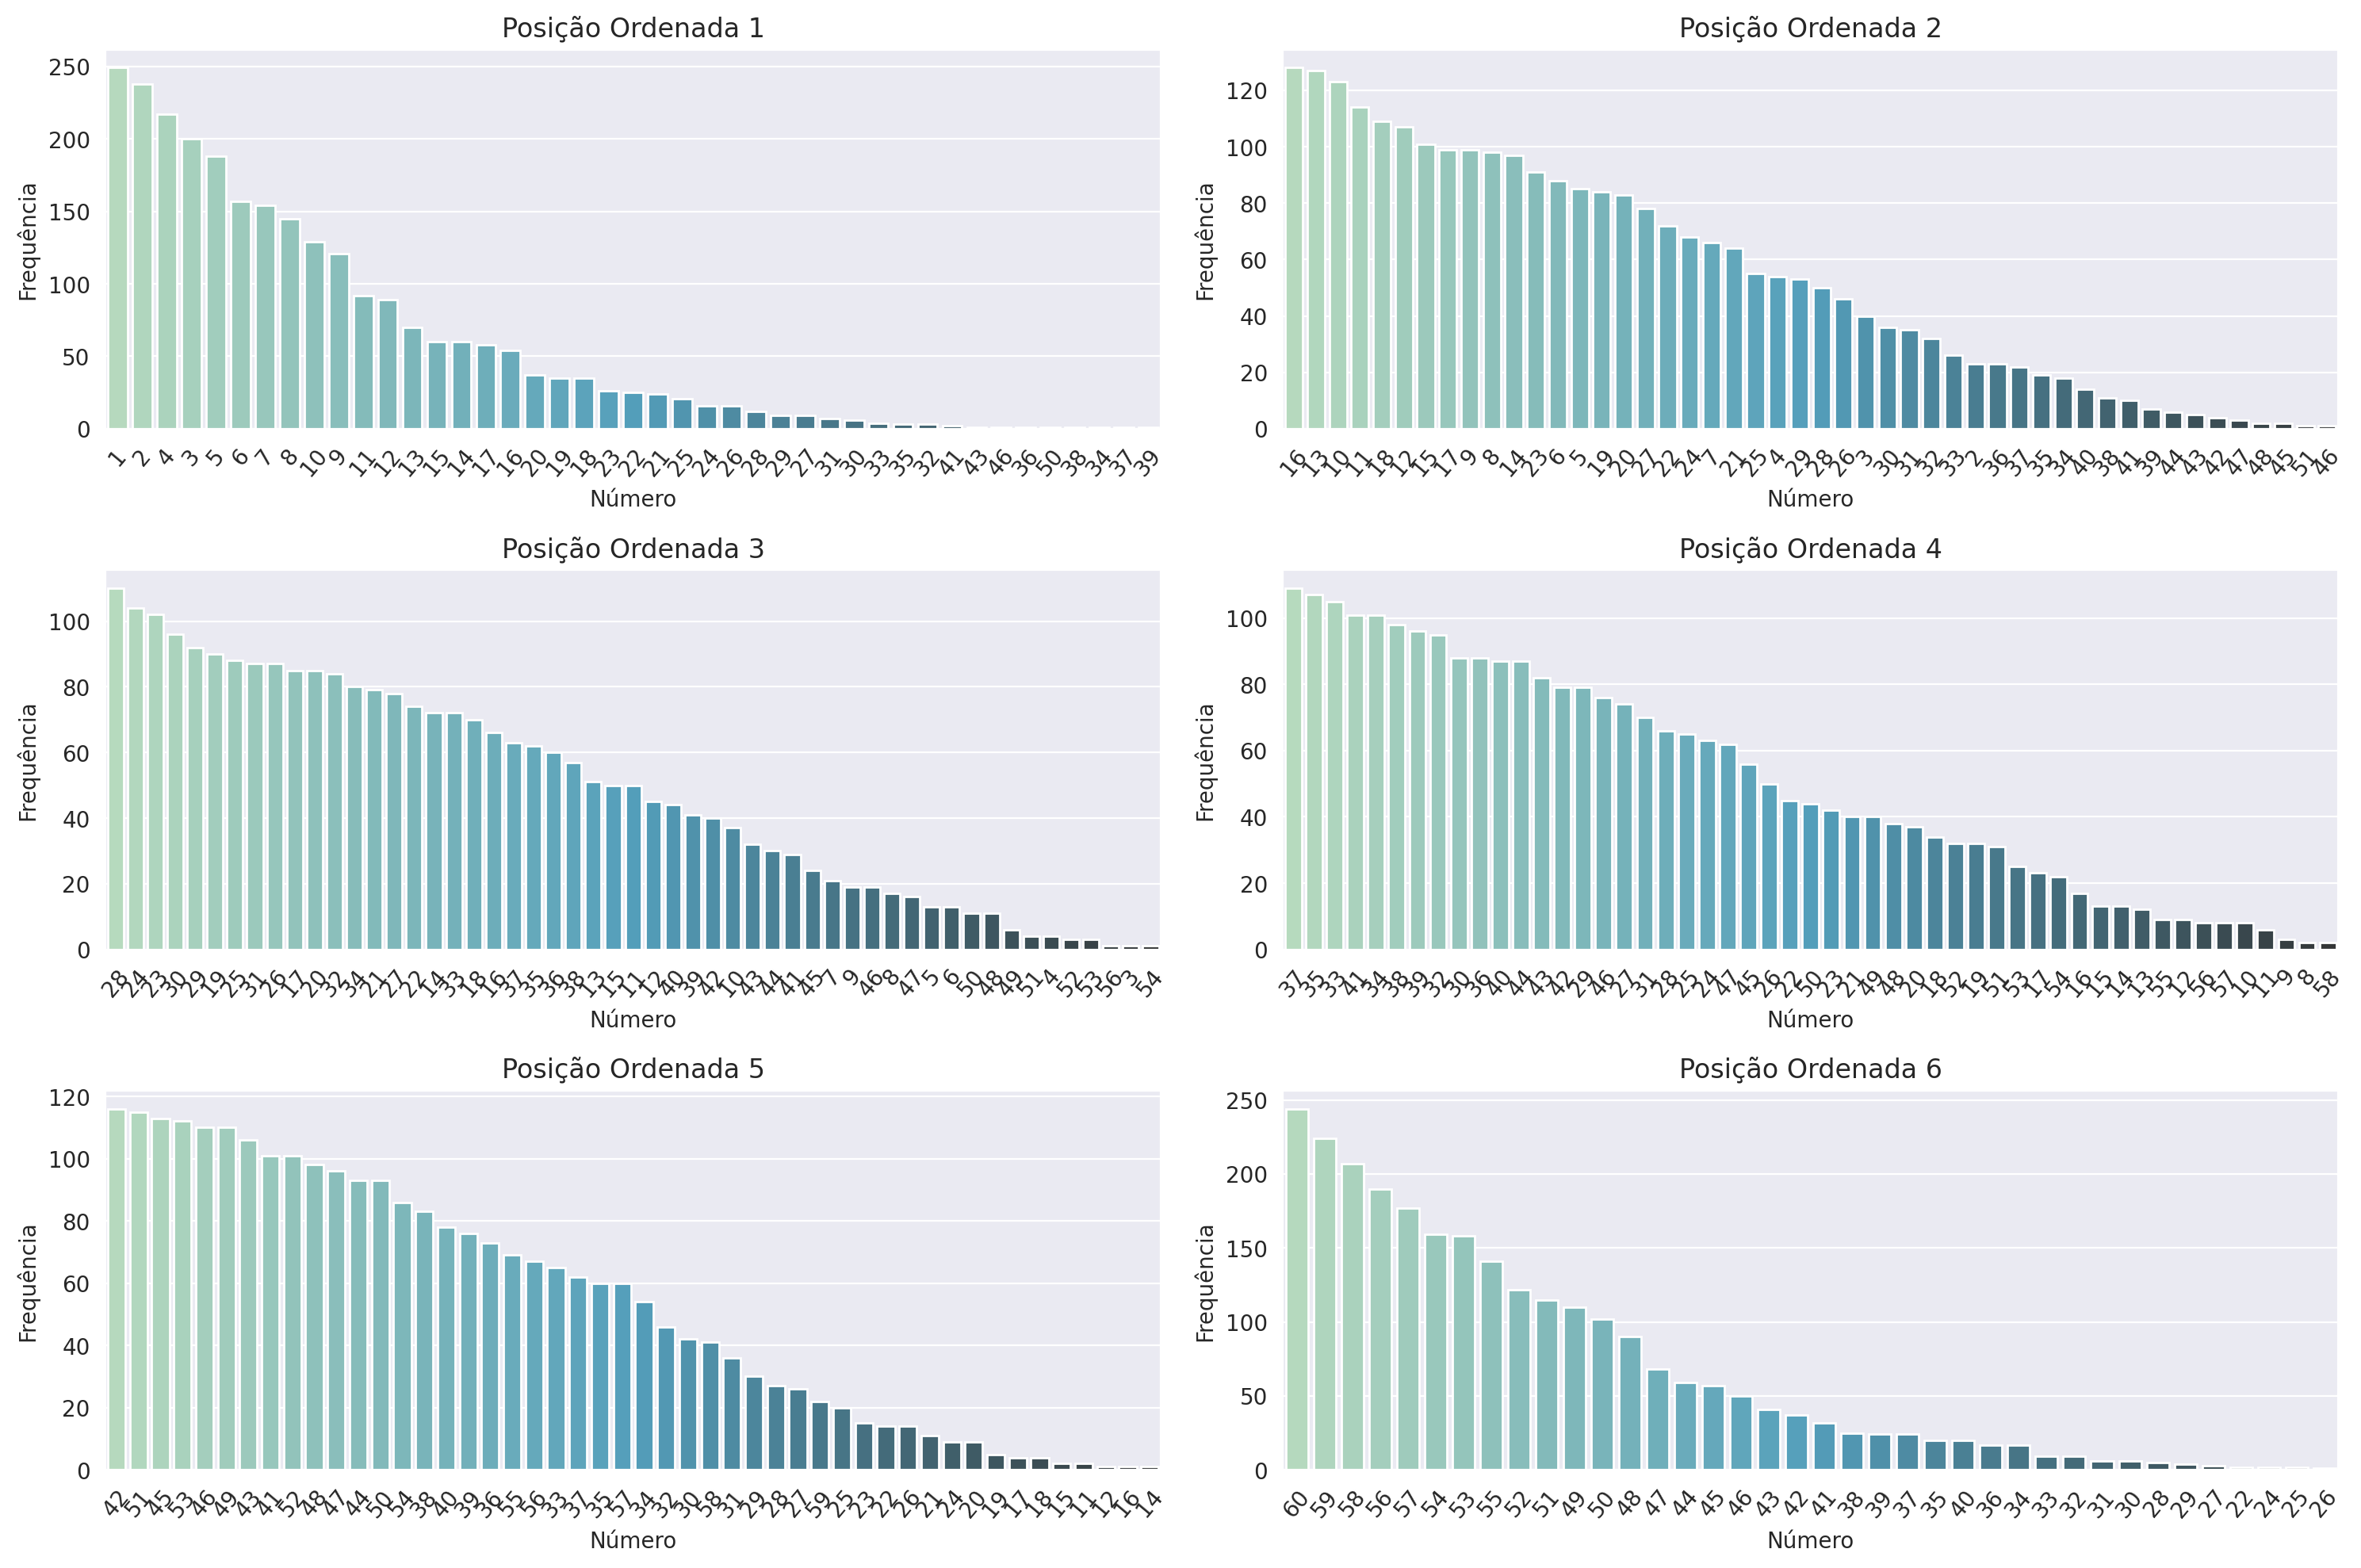

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()

## Main statistics data

In [ ]:
games.describe()

,position_1,position_2,position_3,position_4,position_5,position_6
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,8.630865,17.323769,26.340442,35.077937,43.541683,52.164017
std,7.035667,9.160551,9.997965,9.780868,9.026817,6.965103
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000


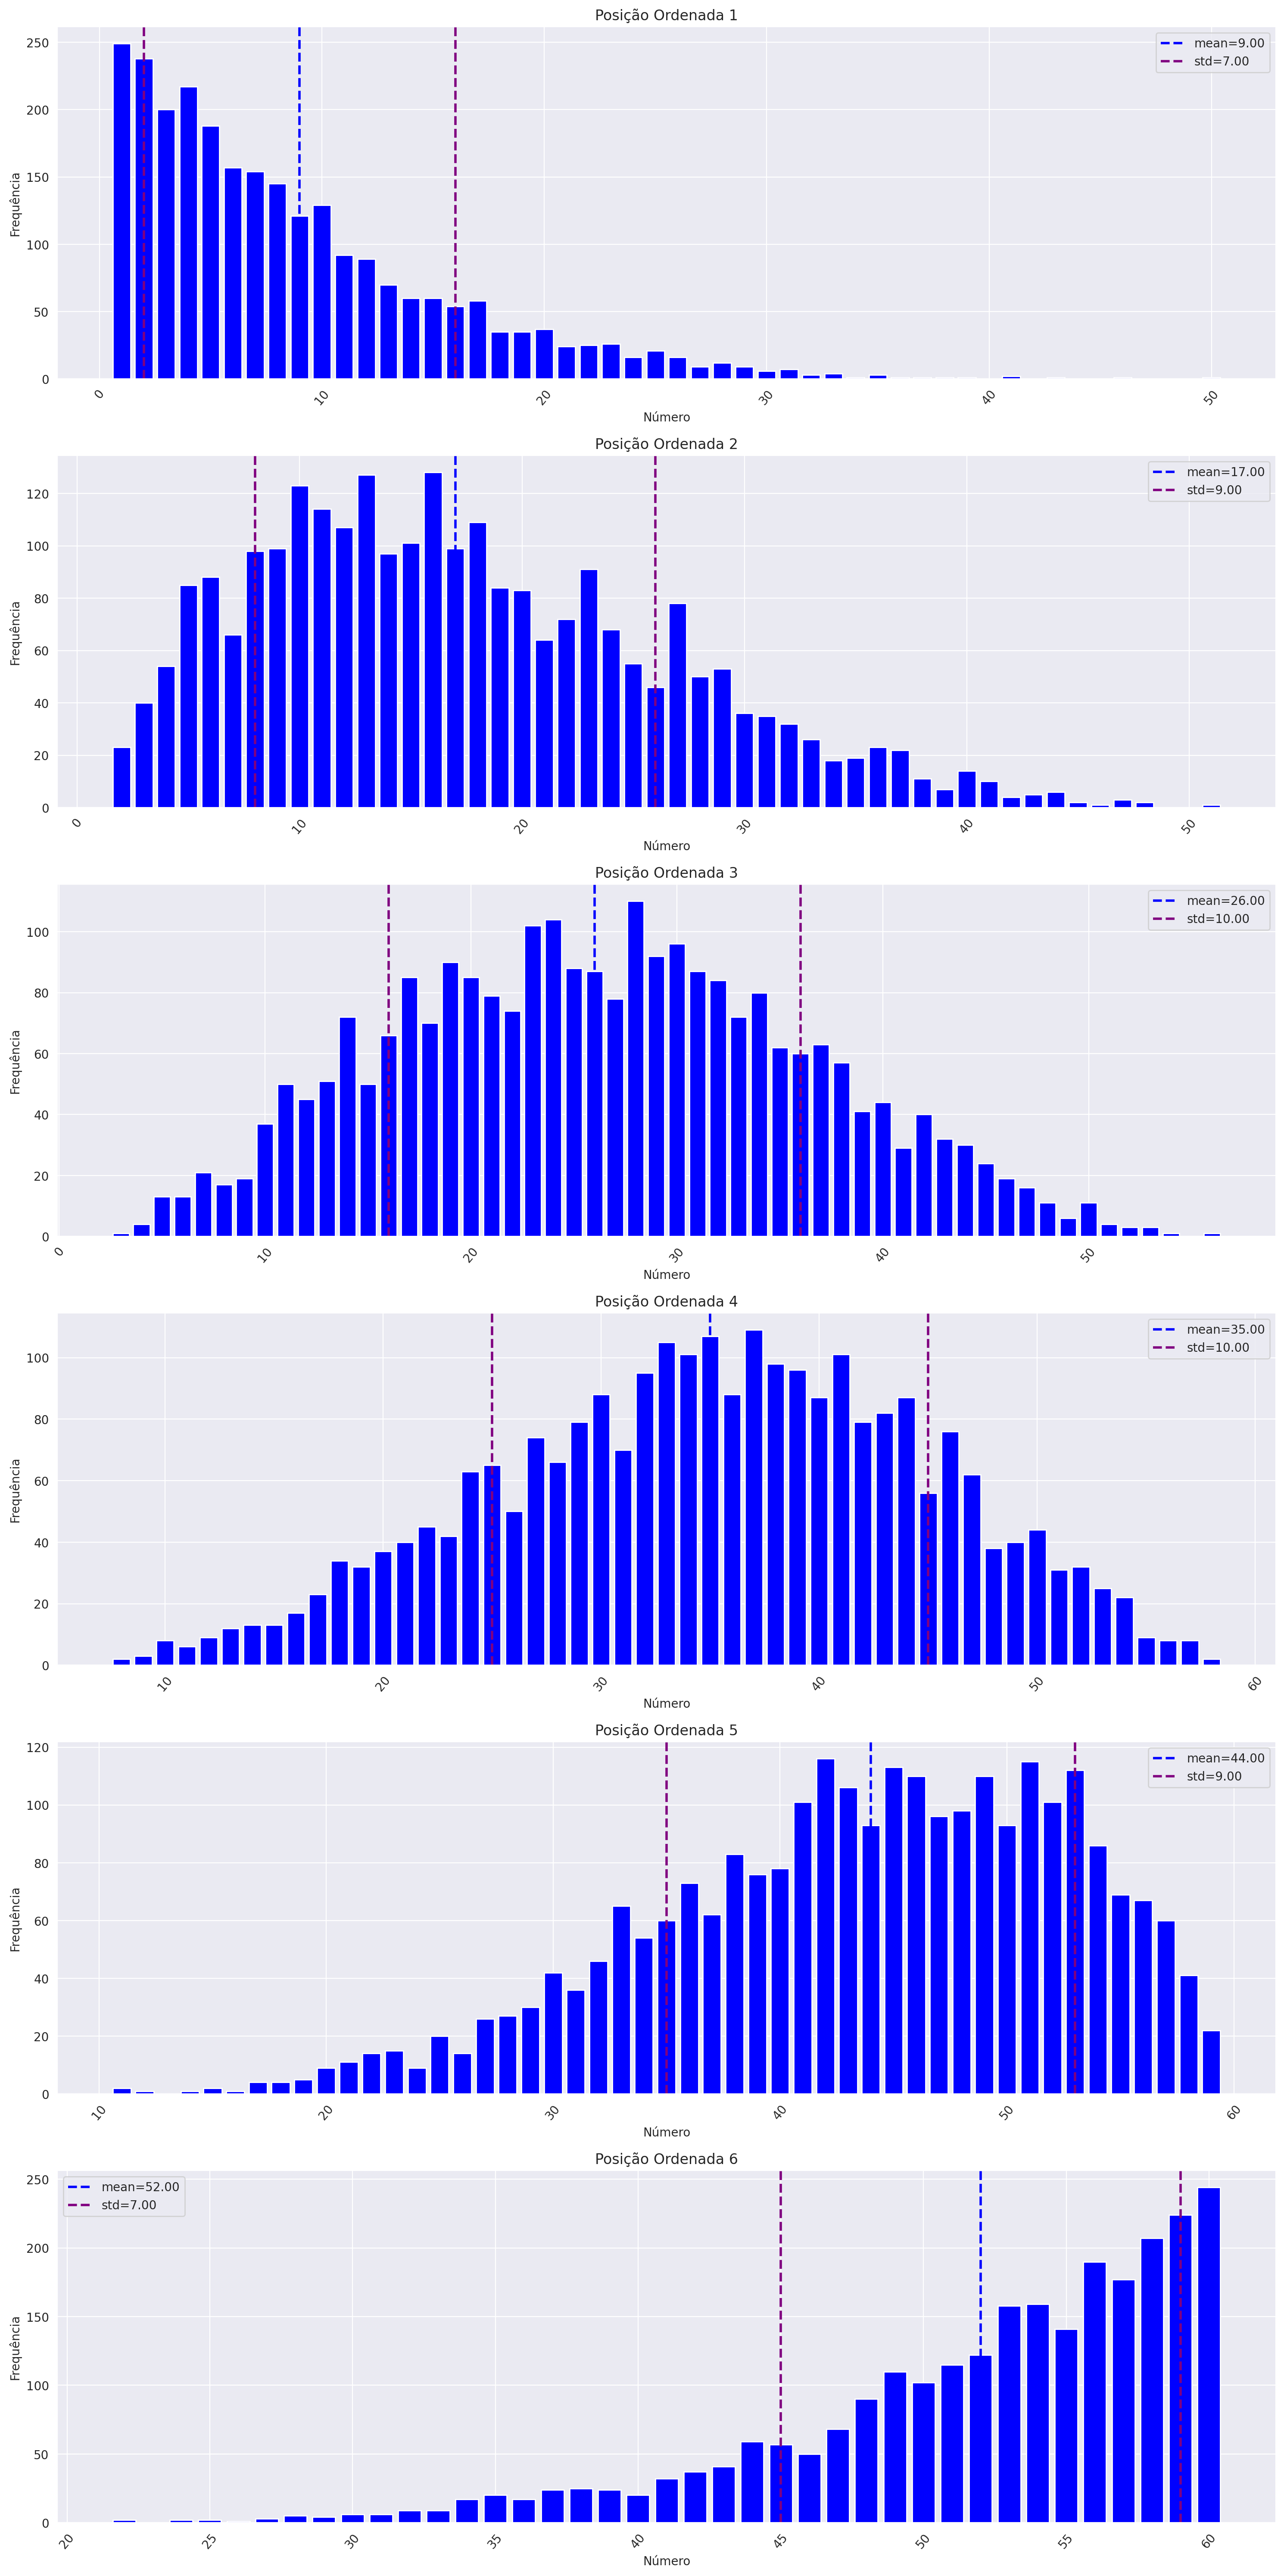

In [ ]:
sorted_positions = []
for i, position in enumerate(positions):
    sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
axs = axs.flatten()

def get_statistics(i):
    column_data = games.iloc[:, i]
    return {
        'mean': column_data.mean().round(0),
        'std': column_data.std().round(0),
        '25%': column_data.describe()['25%'],
        '50%': column_data.describe()['50%'],
        '75%': column_data.describe()['75%'],
    }


def display_statistics(ax, i):
    column_statistics = get_statistics(i)
    ax.axvline(column_statistics['mean'], color='blue', linestyle='dashed', linewidth=2, label=f"mean={column_statistics['mean']:.2f}")
    ax.axvline(column_statistics['mean'] - column_statistics['std'], color='purple', linestyle='dashed', linewidth=2, label=f"std={column_statistics['std']:.2f}")
    ax.axvline(column_statistics['mean'] + column_statistics['std'], color='purple', linestyle='dashed', linewidth=2)
    # ax.axvline(column_statistics['25%'], color='orange', linestyle='dashed', linewidth=2, label='25%')
    # ax.axvline(column_statistics['50%'], color='purple', linestyle='dashed', linewidth=2, label='50%')
    # ax.axvline(column_statistics['75%'], color='green', linestyle='dashed', linewidth=2, label='75%')
    
    # Add legend
    ax.legend(loc='best')


for i, position in enumerate(sorted_positions):
    axs[i].bar(position.index, position.values, color='blue')
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    display_statistics(axs[i], i)

plt.tight_layout()
plt.show()


# Generating a game based on Standard Deviation

## Plotting graphs according to Std

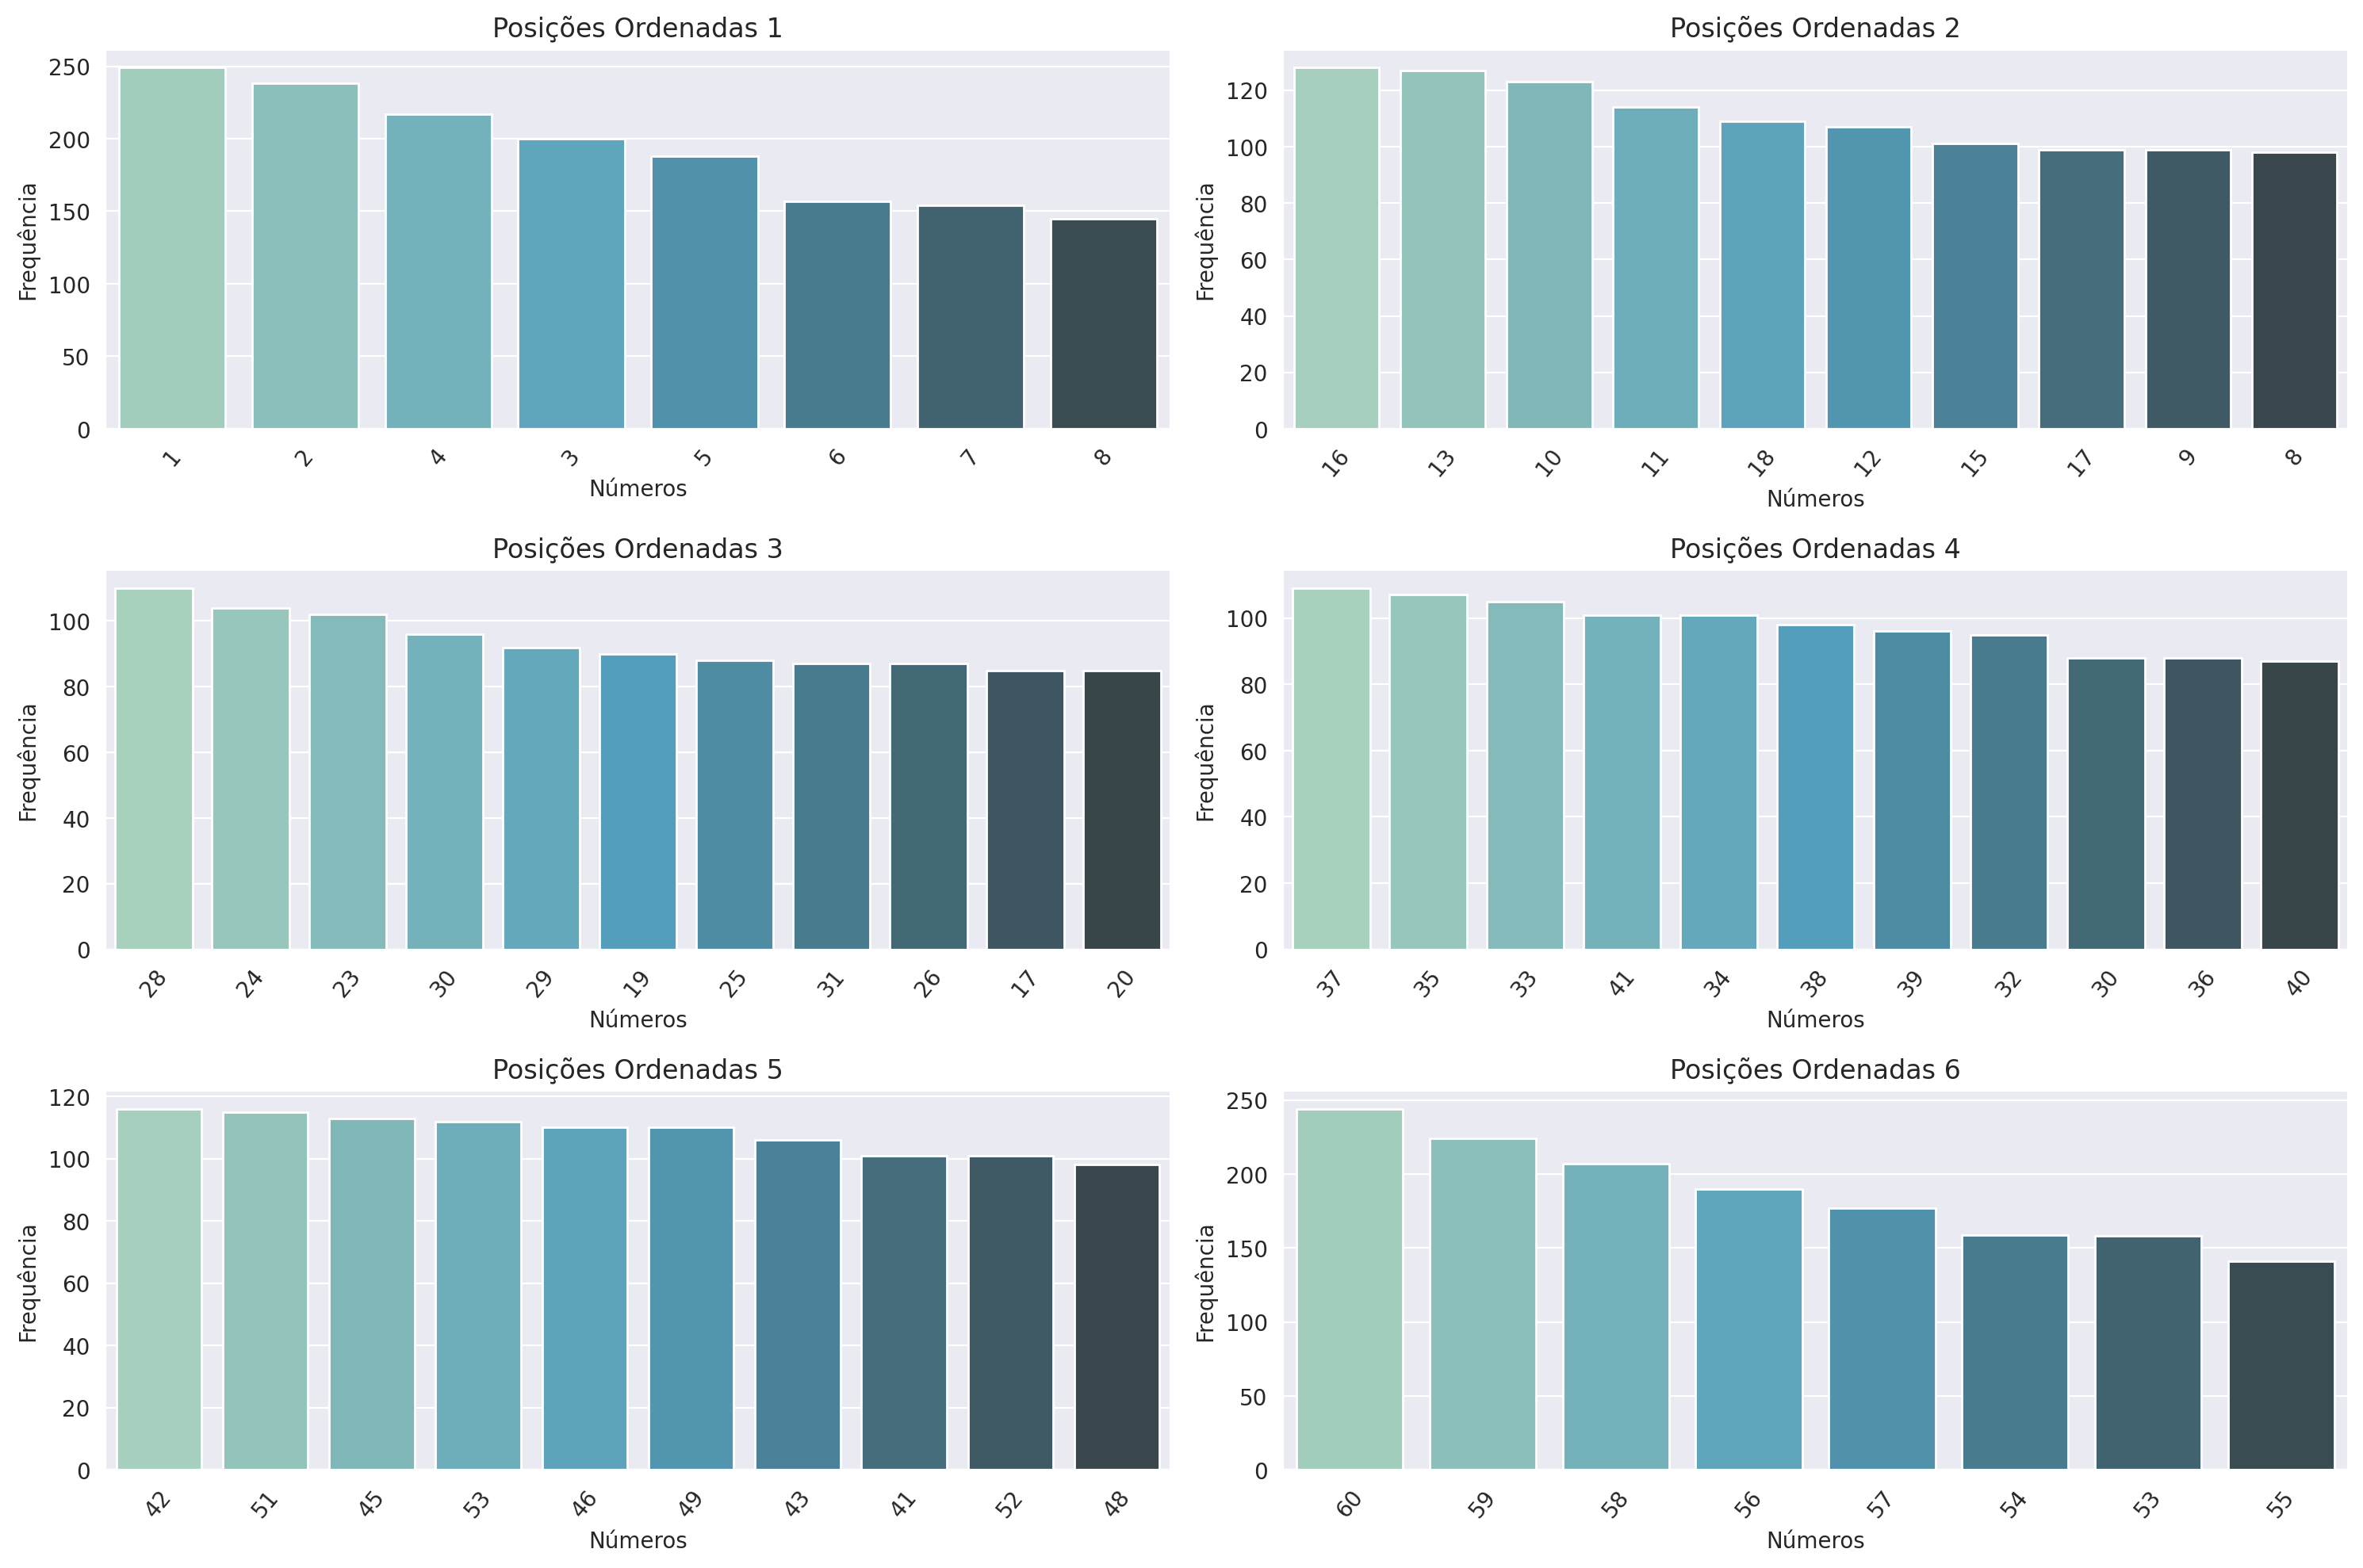

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

sorted_positions_limited = []

for i, position in enumerate(positions):
    counts = games[position].value_counts()
    column_statistics = get_statistics(i)
    std = column_statistics['std']
    upper_limit = int(std)
    
    # Store the original index before resetting it
    original_index = counts.index
    # Reset the index of the limited counts
    counts_limited = counts.reset_index(drop=True)
    
    # Assign the original index back to the limited counts
    counts_limited.index = original_index
    
    # Limit the counts to the upper limit
    counts_limited = counts_limited[:upper_limit+1]
    
    sorted_positions_limited.append(counts_limited)
  

# print(sorted_positions_limited)
for i, position in enumerate(sorted_positions_limited):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posições Ordenadas {i+1}")
    axs[i].set_xlabel('Números')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()


## Generating a game

In [ ]:
import random

def get_guesses():
  guesses = []
  for i, position in enumerate(sorted_positions_limited):
      guess = position.sample().index[0]
      guesses.append(guess)
  return guesses


## Check the guess in the database and generate game based on Std

In [ ]:
from IPython.display import Markdown, display, HTML

# Get past results
past_results = games.values.tolist()
game_number = info.iloc[:, 0].to_list()
date = info.iloc[:, 1].to_list()

# Check guesses against past results
guesses = get_guesses()
correct_guesses = [0] * len(past_results)
for i, result in enumerate(past_results):
    for guess in guesses:
        if guess in result:
            correct_guesses[i] += 1

max_correct_guesses_index = correct_guesses.index(max(correct_guesses))
max_correct_guesses = correct_guesses[max_correct_guesses_index]

if max_correct_guesses >= 4:
    if max_correct_guesses == 4:
        type_of_prize = "Quadra"
    elif max_correct_guesses == 5:
        type_of_prize = "Quina"
    elif max_correct_guesses == 6:
        type_of_prize = "Sena"
    past_result = past_results[max_correct_guesses_index]
    game_number = game_number[max_correct_guesses_index-1]
    date = date[max_correct_guesses_index-1]
else:
    type_of_prize = "Você não ganhou nenhum prêmio."
    past_result = None
    game_number = None
    date = None

# Print output centered on the screen
output = "<center>"
output += "<h1>Número máximo de acertos: {}</h1>".format(max_correct_guesses)
output += "<h1>Palpite:</h1>"
output += '<div style="display: flex; justify-content: center; align-items: center;">'
for guess in guesses:
    output += '<div style="background-color: green; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
    output += str(guess)
    output += '</div>'

output += '</div>'

# Print past result ball
if past_result is not None:
    output += "<h1>Resultado anterior:</h1>"
    output += '<div style="display: flex; justify-content: center; align-items: center;">'
    for value in past_result:
        output += '<div style="background-color: blue; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
        output += str(value)
        output += '</div>'

    output += '</div>'
    output += '<div style="width: 20%; margin: 10px; border: 2px solid; border-radius: 8px;">'
    output += '<p>Data: {}</p>'.format(date)
    output += '<p>Tipo de prêmio: {}</p>'.format(type_of_prize)
    output += '<p>Jogo número: {}</p>'.format(game_number)
    output += '</div>'

else:
    output += '<h1 style="color: red">{}</h1>'.format(type_of_prize)
output += "</center>"
display(HTML(output))


## Using Machine Learning to predict a new result

### Plotting time series for positions

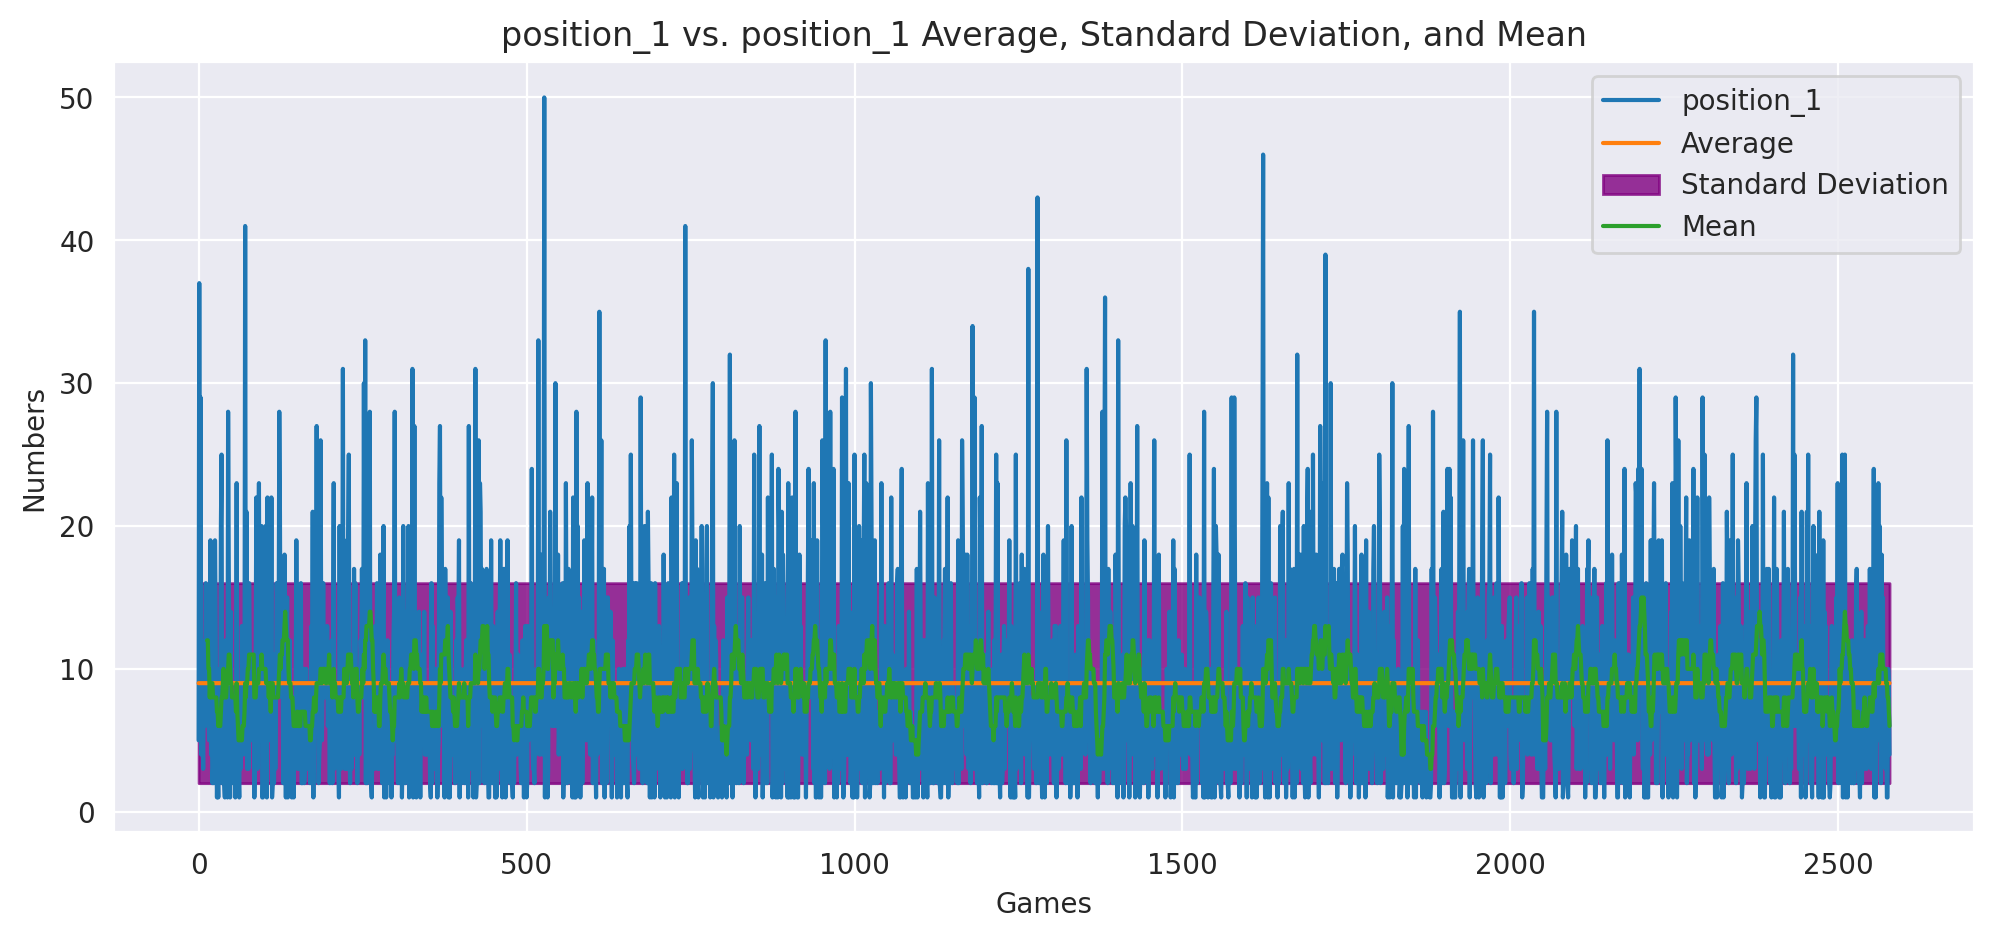

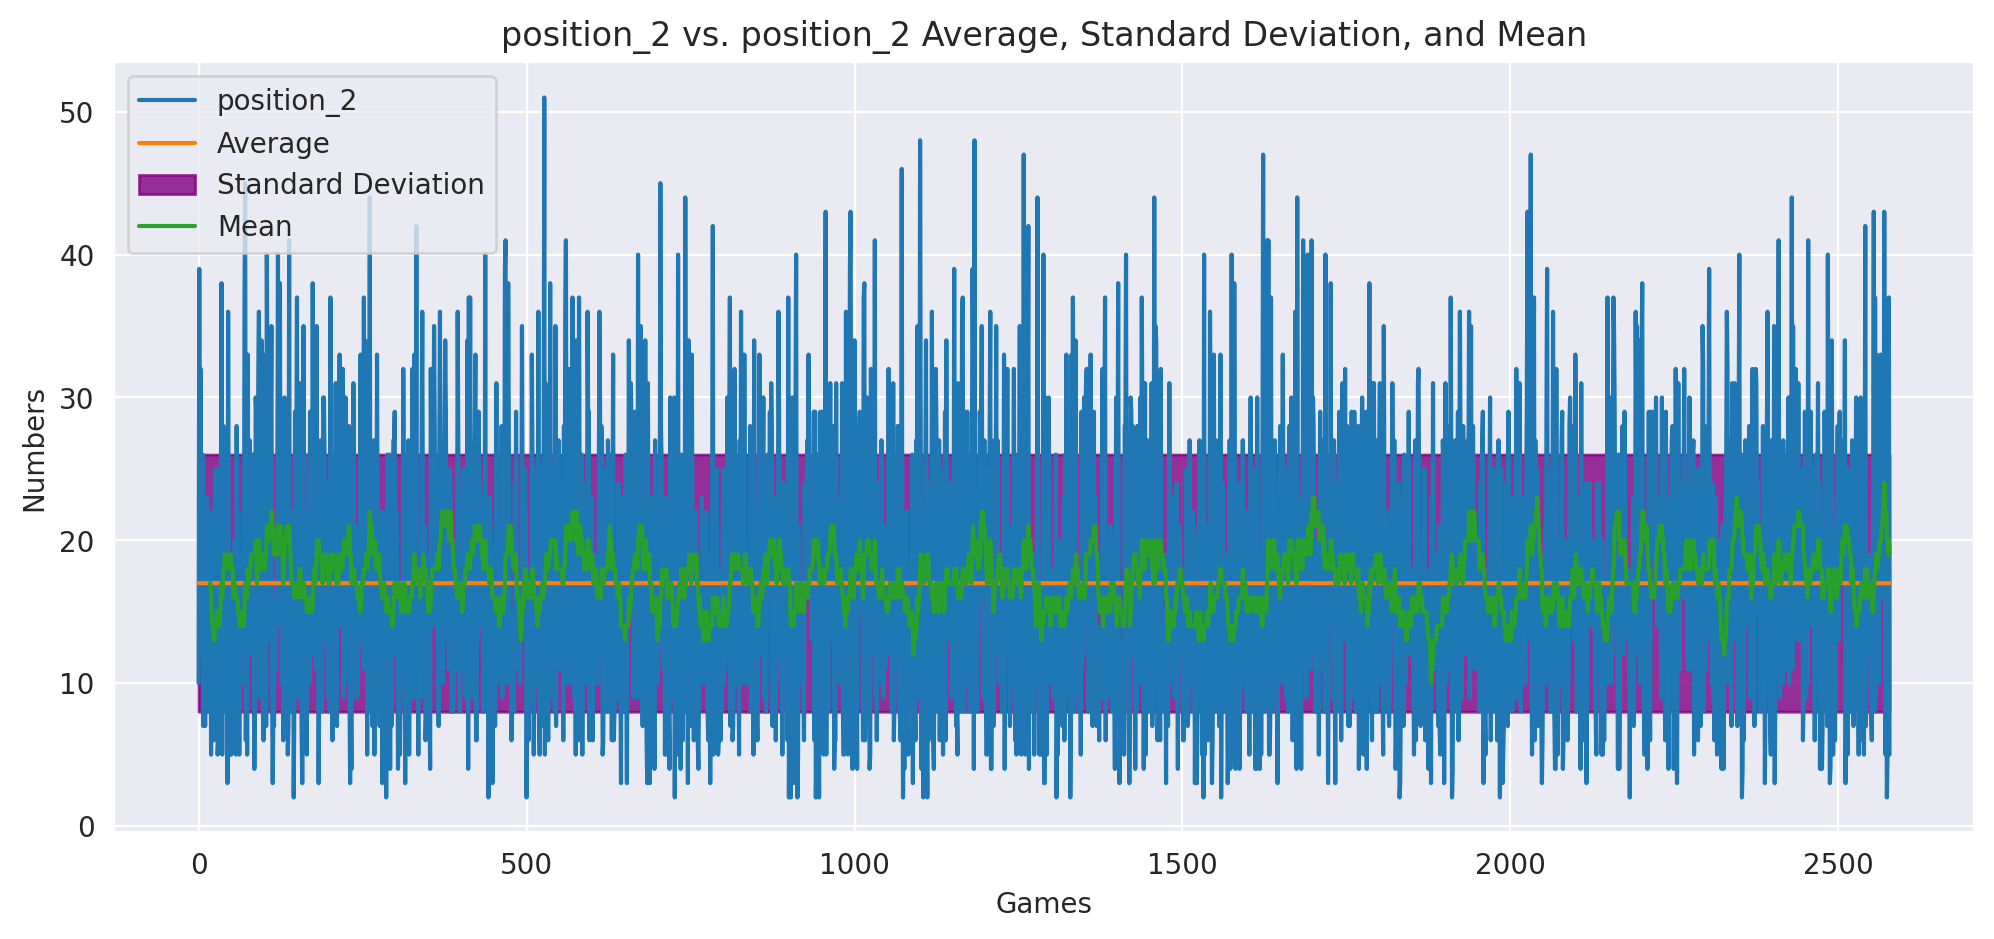

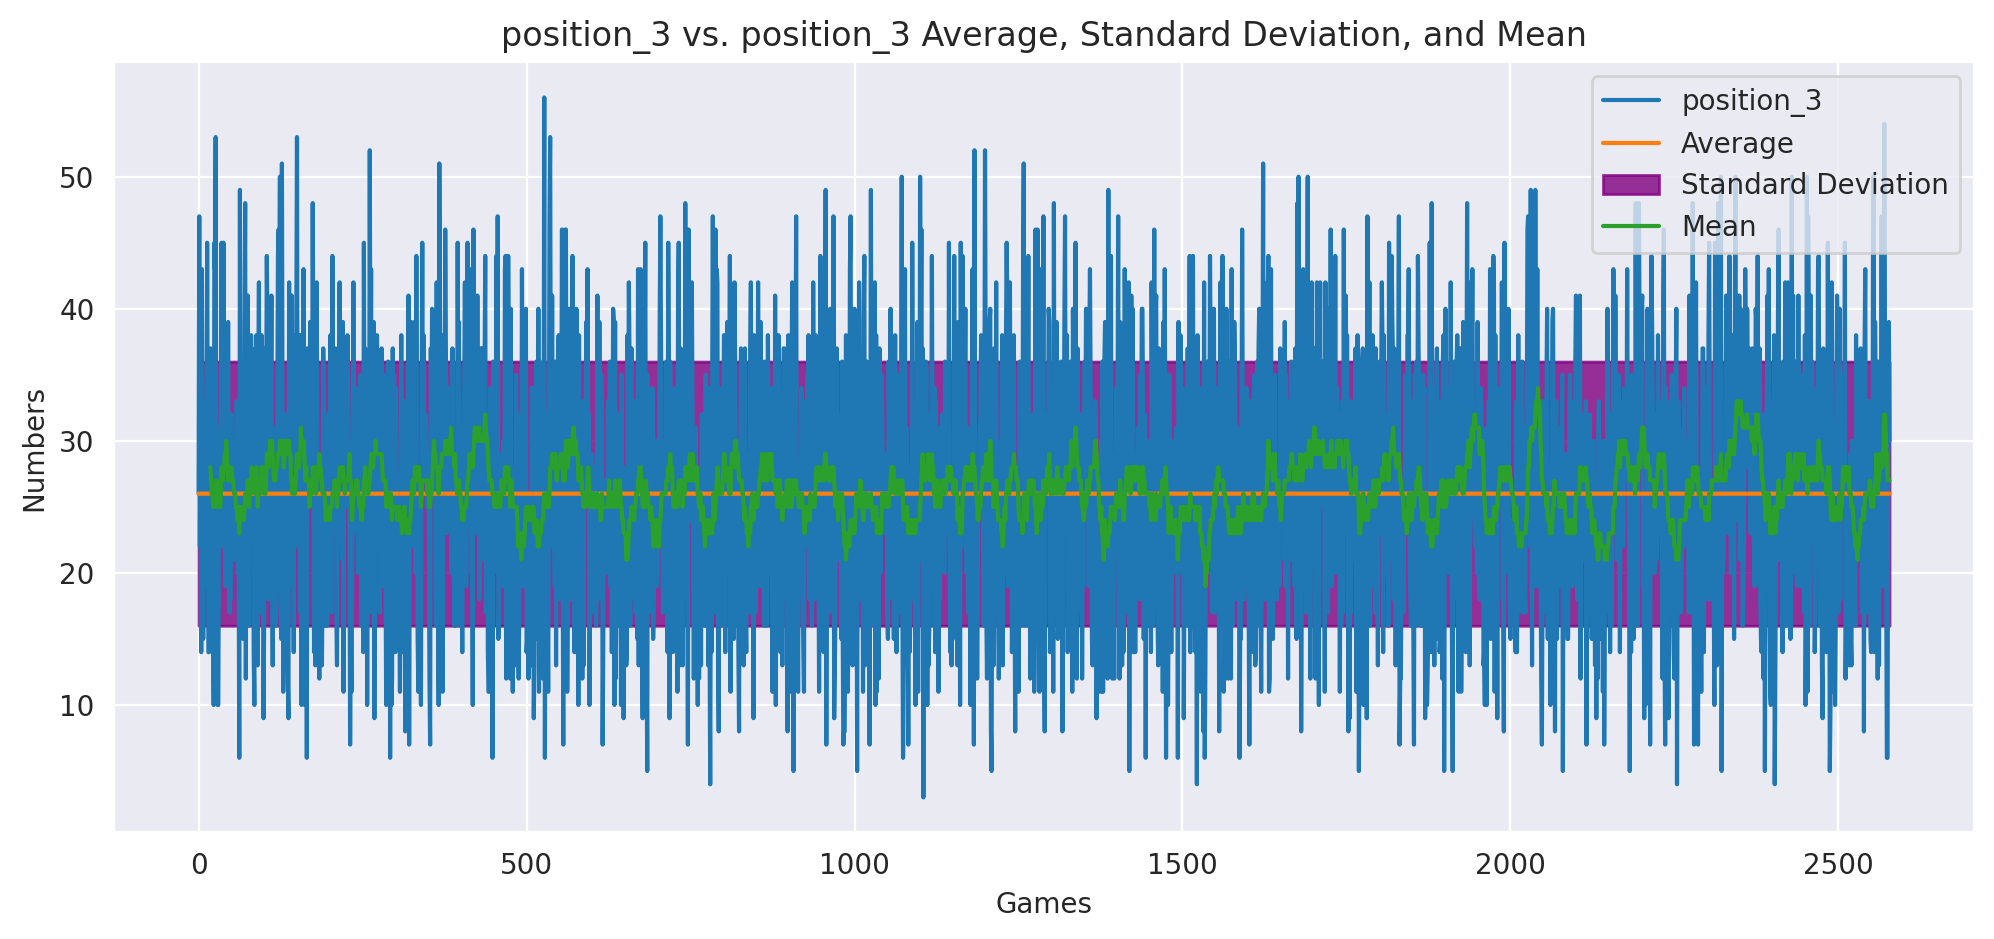

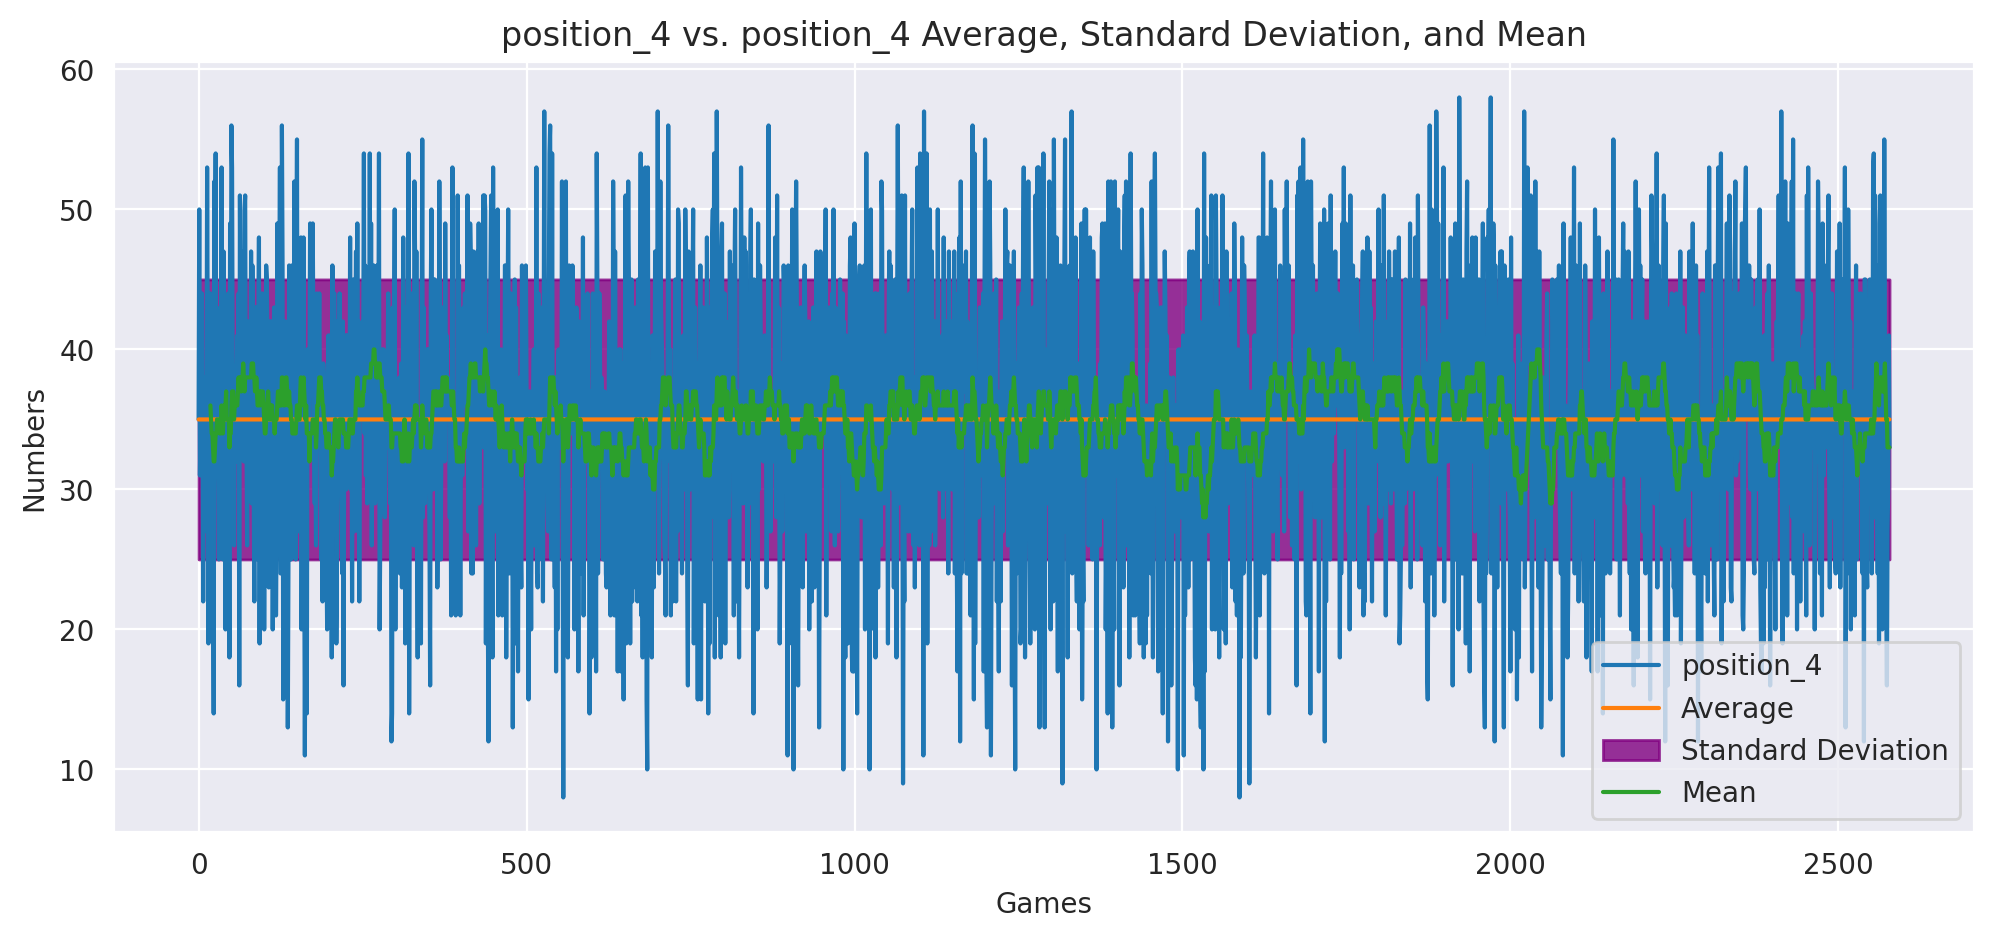

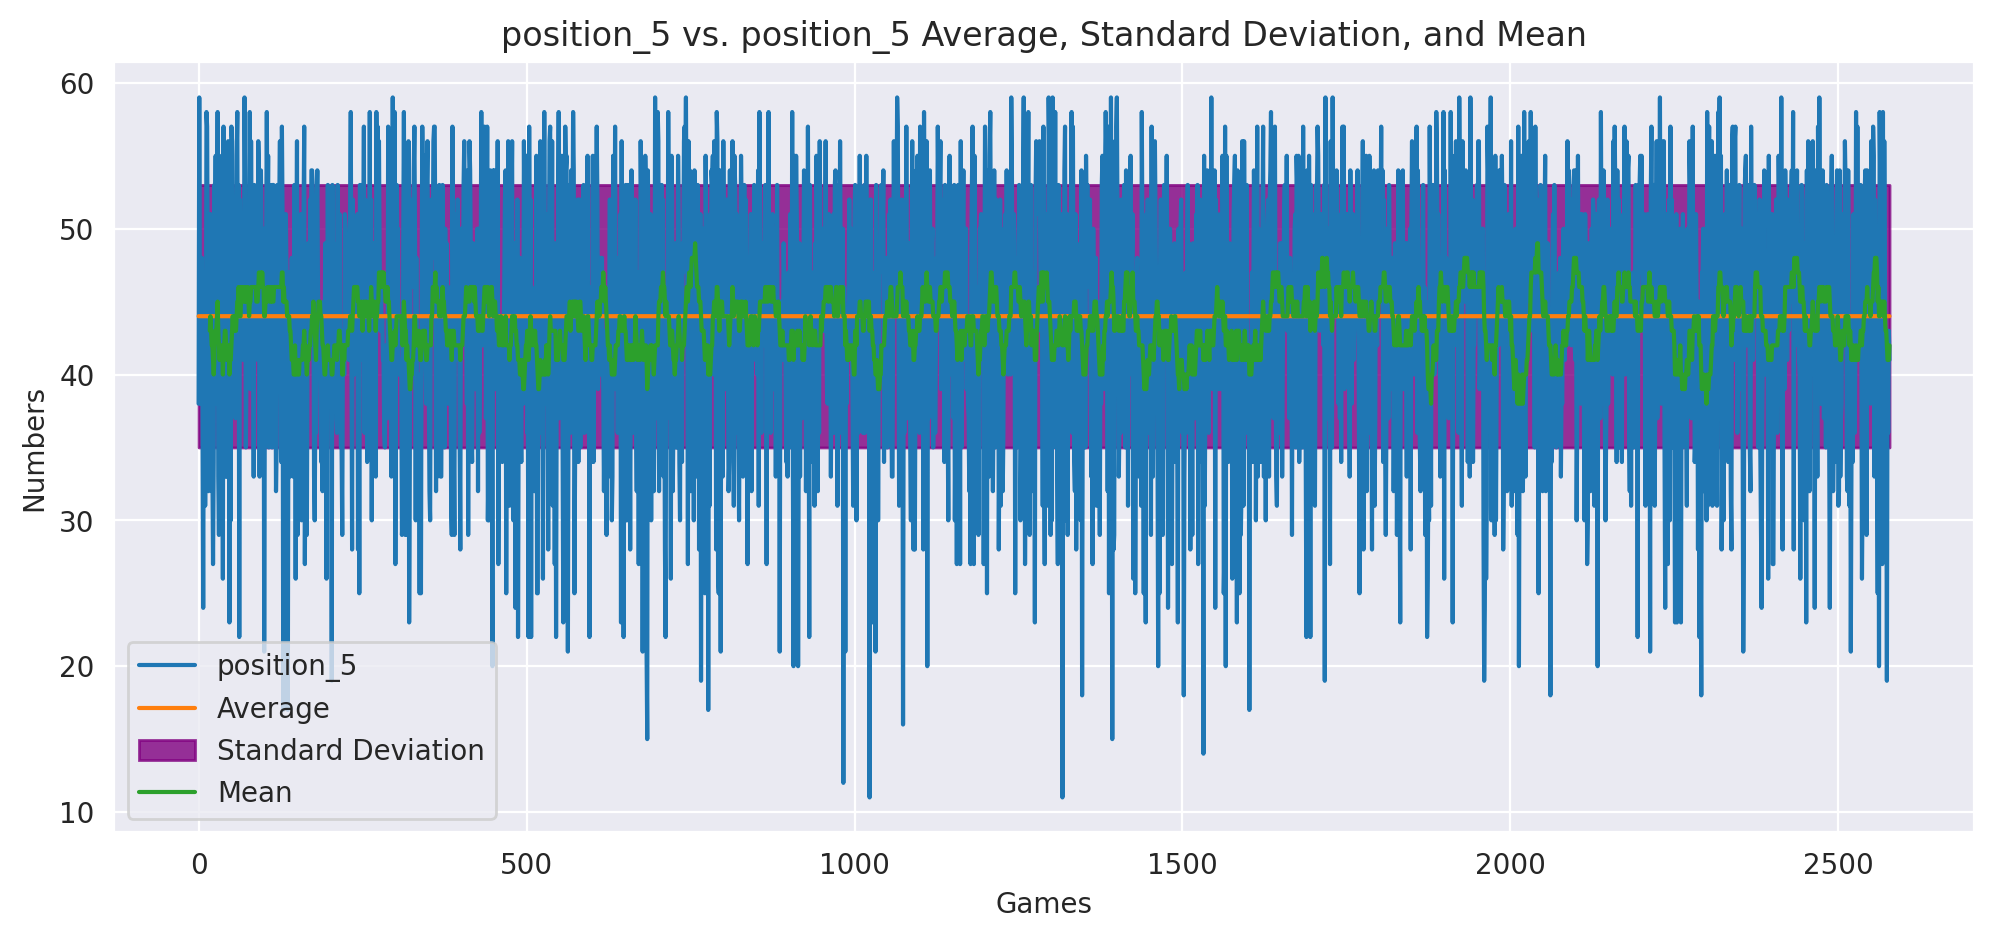

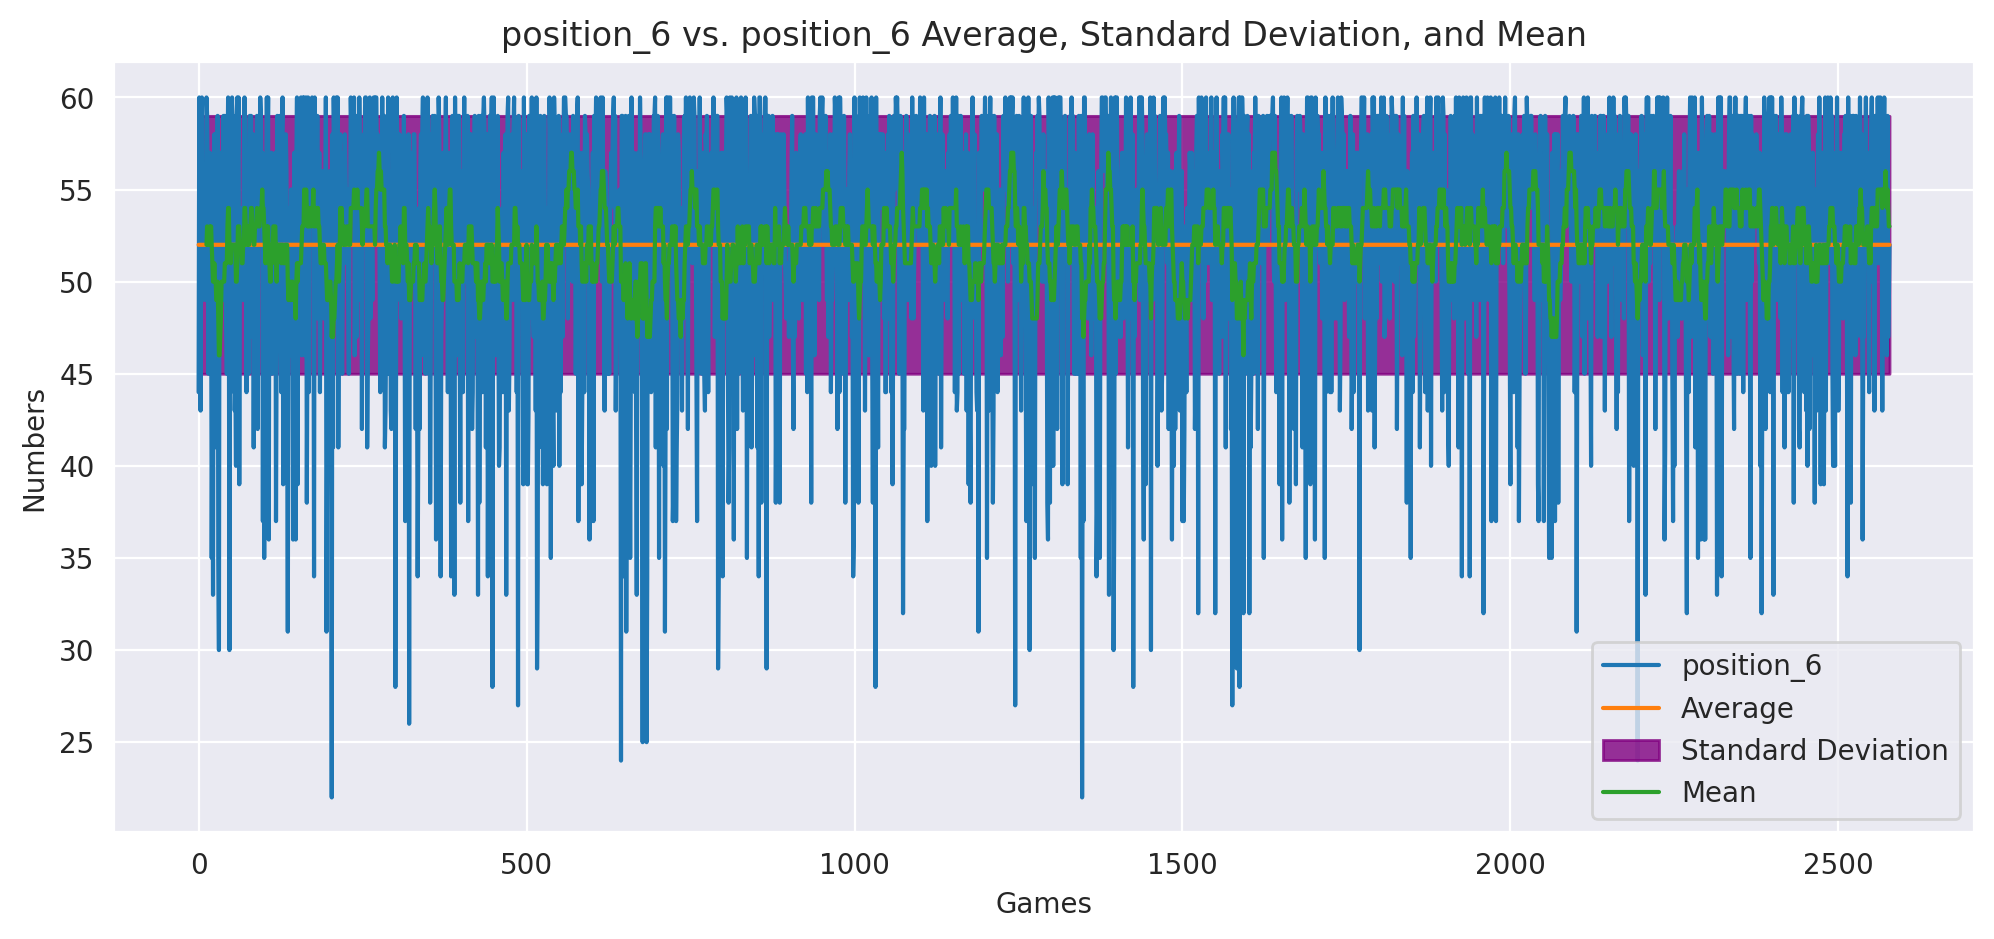

In [ ]:
# Create a dictionary to store position data
position_data = {}

# Iterate over the positions and plot each position's graph
for position in positions:
    # Extract position data and calculate its average and standard deviation
    position_data[position] = games[position]
    position_avg = pd.Series([position_data[position].mean()] * len(position_data[position])).round(0)
    position_std = pd.Series([position_data[position].std()] * len(position_data[position])).round(0)
    position_std_max = pd.Series([(position_avg + position_std)[0]] * len(position_data[position])).round(0)
    position_std_min = pd.Series([(position_avg - position_std)[0]] * len(position_data[position])).round(0)
    window_length = int(position_data[position].std() * 2)
    position_data[position+'_mean'] = position_data[position].rolling(window_length).mean().round(0) # Adding the rolling mean
    
    # Plot the position graph with average, standard deviation, and mean
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(position_data[position], label=position)
    ax.plot(position_avg, label='Average')
    ax.fill_between(position_data[position].index, position_std_min[0], position_std_max[0], alpha=0.8, color='purple', label='Standard Deviation')
    ax.plot(position_data[position+'_mean'], label='Mean')
    ax.set_xlabel('Games')
    ax.set_ylabel('Numbers')
    ax.set_title(position + ' vs. ' + position + ' Average, Standard Deviation, and Mean')
    ax.legend()
    plt.show()


### Using ARIMA Model to predict next result

#### Prediction using games model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Check data characteristics
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    # Get the ADF test results
    adf_stat = dftest[0]
    p_val = dftest[1]
    num_lags = dftest[2]
    num_obs = dftest[3]
    crit_vals = dftest[4]

    # Check if the dataset is stationary
    if p_val <= 0.05:
        is_stationary = True
    else:
        is_stationary = False

    # Check if the dataset is predictable
    if is_stationary and abs(adf_stat) > crit_vals['5%']:
        is_predictable = True
    else:
        is_predictable = False

    # Print the results
    print("Is stationary? ", is_stationary)
    print("Is predictable? ", is_predictable)

# Define parameters for ARIMA model
# p: Qty of past numbers considered
# d: Hability to capture flutuations and spikes
# q: Moving average window
p, d, q = 5, 1, 1

# Fit ARIMA models for each position
models = {}
avg_array = []
std_array = []
for position in positions:
    # Get global average
    input_data = position_data[position]
    avg_array.append(input_data.mean().round(0))
    std_array.append(input_data.std().round(0))
    # Replace NaN values with 0
    input_data.fillna(0, inplace=True)
    # Fit the model
    model = ARIMA(input_data.values, order=(p, d, q)).fit()
    models[position] = model

# Predict next numbers for each position
predictions = {}
for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=1)
    predictions[position] = int(pred[0])

predicted_numbers = [predictions[position] for position in positions]
    
# Check if predicted numbers fit the std
std_array_range = []
check_prediction = [True] * len(positions)
prediction_error_pct = []

for position in range(0,len(positions)):
    prediction_error = round(avg_array[position] - predicted_numbers[position], 0)
    prediction_error_pct.append(round(prediction_error/avg_array[position] * 100, 2))
    std_min = avg_array[position] - std_array[position];
    std_max = avg_array[position] + std_array[position];
    std_array_range.append(str(std_min) + ' - ' + str(std_max))
    # Check if the predicted number is outside the range defined by the mean +/- the standard deviation
    if predicted_numbers[position] < std_min or predicted_numbers[position] > std_max:
        check_prediction[position].append(False)
    
for position in positions:
    print('AD Test ', position, ':')
    ad_test(position_data[position])

print('Predicted Numbers: ', predicted_numbers)
print('Mean: ', avg_array)
print('Standard Deviation (min-max): ', std_array_range)
print('Predicted value inside of range with Std: ', check_prediction)
print('Prediction Error (%): ', prediction_error_pct)



AD Test  position_1 :
Is stationary?  True
Is predictable?  True
AD Test  position_2 :
Is stationary?  True
Is predictable?  True
AD Test  position_3 :
Is stationary?  True
Is predictable?  True
AD Test  position_4 :
Is stationary?  True
Is predictable?  True
AD Test  position_5 :
Is stationary?  True
Is predictable?  True
AD Test  position_6 :
Is stationary?  True
Is predictable?  True
Predicted Numbers:  [8, 17, 26, 35, 43, 52]
Mean:  [9.0, 17.0, 26.0, 35.0, 44.0, 52.0]
Standard Deviation (min-max):  ['2.0 - 16.0', '8.0 - 26.0', '16.0 - 36.0', '25.0 - 45.0', '35.0 - 53.0', '45.0 - 59.0']
Predicted value inside of range with Std:  [True, True, True, True, True, True]
Prediction Error (%):  [11.11, 0.0, 0.0, 0.0, 2.27, 0.0]


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


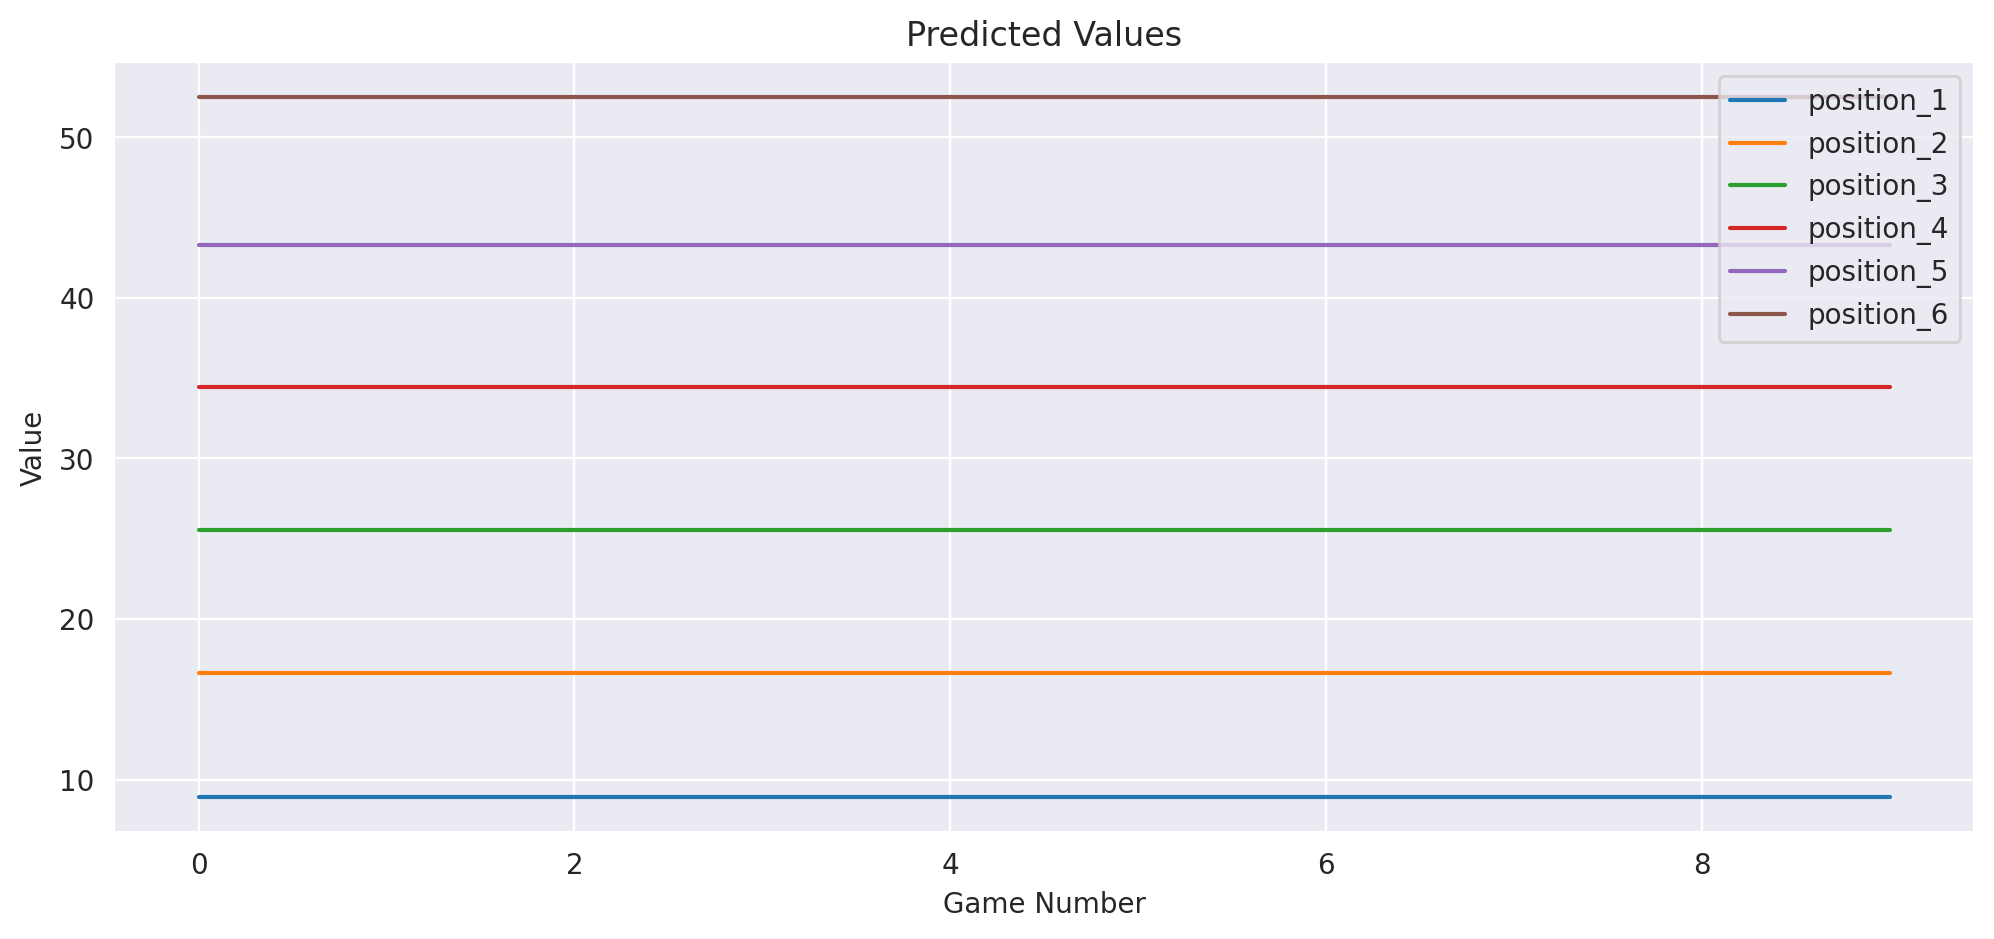

In [ ]:
# Generate random data for 100 games and 5 positions
np.random.seed(42)
predictions_qty = 10
# position_data = {position: pd.Series(np.random.randint(0, predictions_qty, predictions_qty)) for position in positions}

# Define parameters for ARIMA model
# p: Qty of past numbers considered
# d: Hability to capture flutuations and spikes
# q: Moving average window
p, d, q = 10, 1, 2

# print(position_data)
# Fit ARIMA models for each position
models = {}
for position in positions:
   # Get global average
    input_data = position_data[position]
    # Replace NaN values with 0
    input_data.fillna(0, inplace=True)
    # Fit the model
    model = ARIMA(input_data.values, order=(p, d, q)).fit()
    models[position] = model

# Predict next numbers for each position for the next 100 games
predictions = {}
for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=predictions_qty)
    predictions[position] = int()

# Plot predicted values for each position
fig, ax = plt.subplots(figsize=(12, 5))

for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=predictions_qty)
    # Create an array with the predicted values for all games
    y = np.full(predictions_qty, pred[0])
    plt.plot(np.arange(predictions_qty), y, label=position)

plt.legend()
plt.title('Predicted Values')
plt.xlabel('Game Number')
plt.ylabel('Value')
plt.show()